In [3]:

import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(86)
nature_colors  = {
    'Beaufort_Coastal_Plain': '#61A2F9',  
    'Brooks_Foothills': '#E1CAFC',        
    'Northern_Brooks_Range': '#FFA731',  
    'Southern_Brooks_Range': '#FC7E99',   
    'Kobuk_Ridges_and_Valley': '#A7E213' 
}

# D13c std

# old


In [4]:
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\d13c_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33497),
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',181197),   
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 183403),    
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20401),
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),  
    
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 33497),   
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 181197), 
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 183403),
    
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d13c_std.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland', 81225),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_d13c_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Glaciated_Upland', 220328),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d13c_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 144299),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_d13c_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 220328),
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d13c_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 144299),  
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_d13c_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 169308),
# 'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d13c_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 13812),   
# 'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d13c_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 6397), 
'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d13c_std.tif':('Northern_Brooks_Range', 'Arctic_Rocky_Acidic_Alpine', 607152), 
'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d13c_std.tif':('Northern_Brooks_Range', 'Rocky_Glaciated_Upland', 392847 ), 
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 232652),  
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 86845), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 242746), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 67786), 
'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Alkaline_Alpine', 49196),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 232747),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 88024),
'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_d13c_std.tif':('Kobuk_Ridges_and_Valley', 'Boreal_Gravelly_Riverine', 356712),
'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_d13c_std.tif':('Kobuk_Ridges_and_Valley', 'Peaty_Glaciated_Upland', 363506),
'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d13c_std.tif':('Kobuk_Ridges_and_Valley', 'Rocky_Glaciated_Upland', 279781)
}

True min: 1.5260515213012695
True min: 3.106611728668213


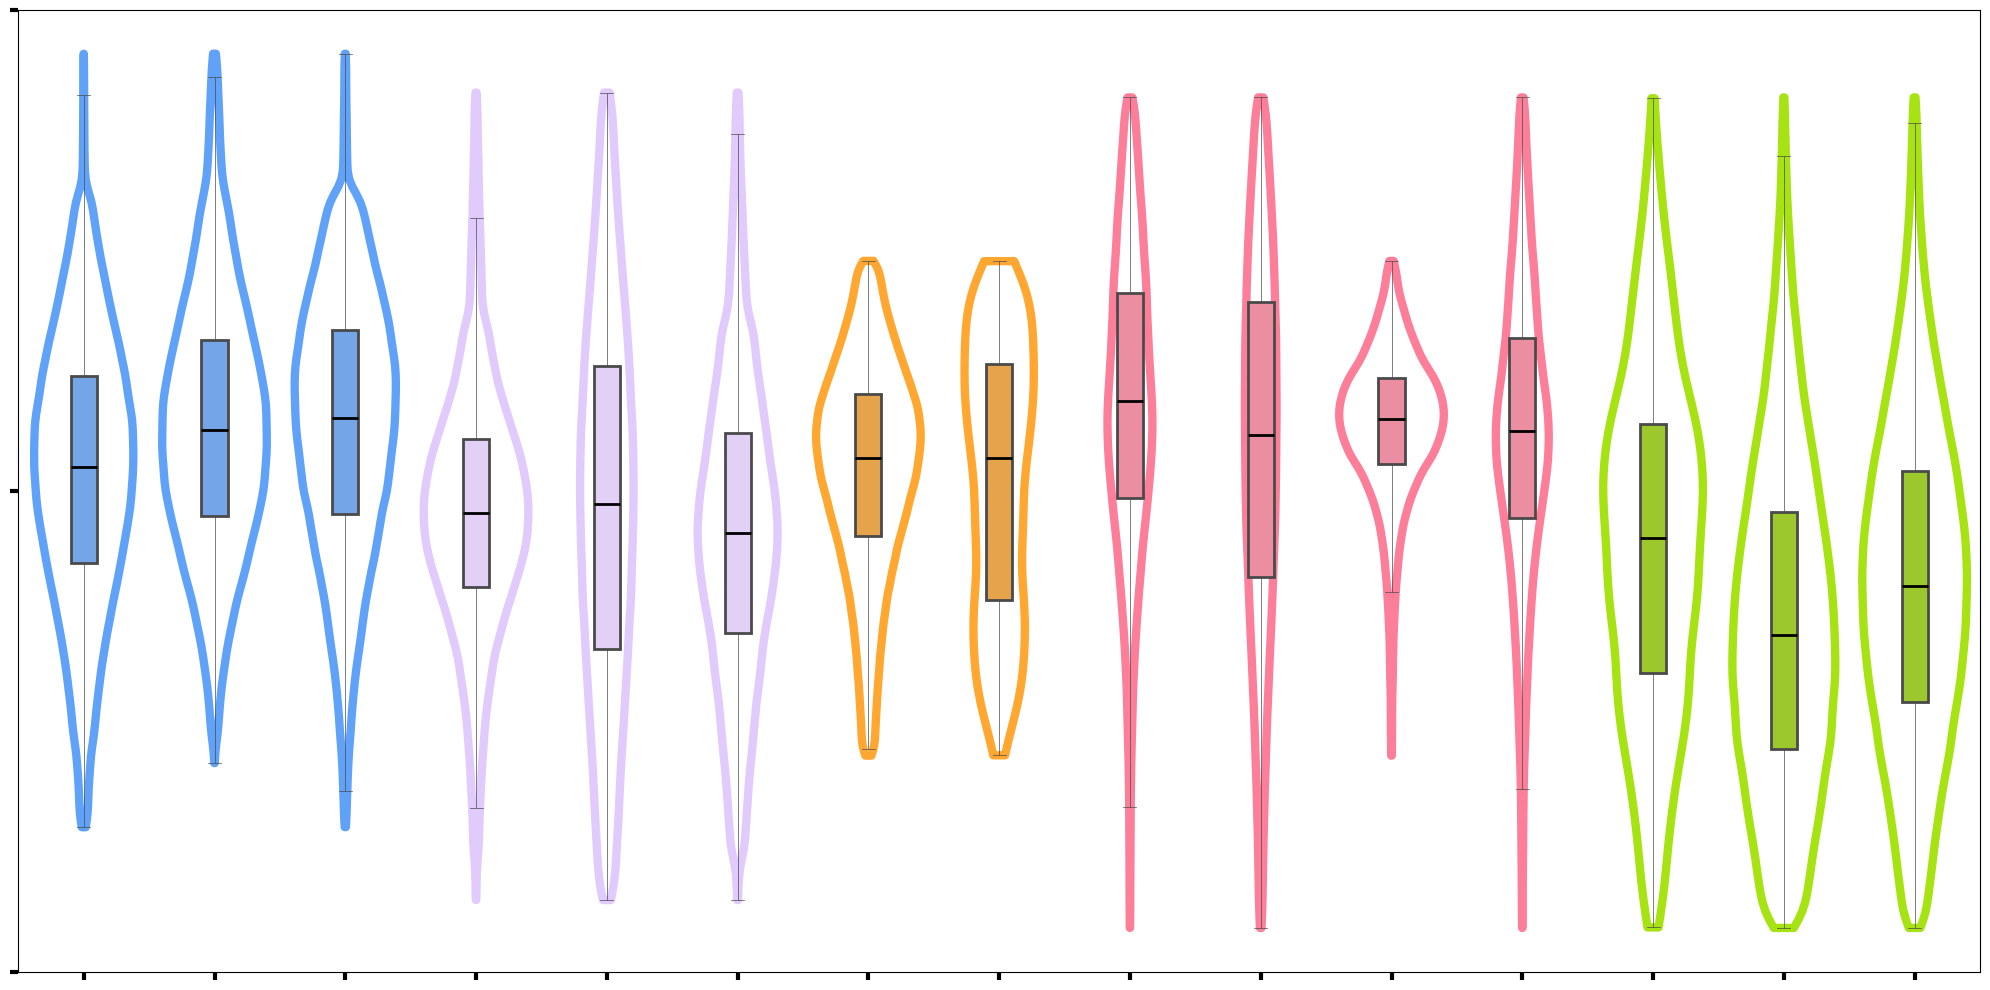

In [5]:



# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        ecoregion_values[key].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Create combined group labels
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define color palette for ecoregions only
# color_map = {
#     'Beaufort_Coastal_Plain': 'salmon',
#     'Brooks_Foothills': 'goldenrod',
#     'Northern_Brooks_Range': 'lightskyblue',
#     'Southern_Brooks_Range': 'lightpink',
#     'Kobuk_Ridges_and_Valley': 'forestgreen'
# }

plt.figure(figsize=(20, 10))

# 1. 创建小提琴图（无填充，只有轮廓）
violins = sns.violinplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,
    linewidth=6,
    saturation=1,
    inner=None,
    cut=0,
    dodge=False,                  # 不分开 violin（整组一个 outline）
    fill=False                    # 无填充
)

# 2. 创建箱线图（叠在 violin 上，填充带透明度）
boxplots = sns.boxplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,        # 初始颜色，后面同步
    width=0.2,
    linewidth=5,
    boxprops={'linewidth': 2, 'alpha': 1},  # 透明度设置在这里
    whiskerprops={'linewidth': 0.5},
    capprops={'linewidth': 0.5},
    medianprops={'color': 'black', 'linewidth': 2},  # 中位线保持黑色
    flierprops={
        'marker': 'o',
        'markersize': 10,
        'markeredgecolor': 'none',
        'alpha': 0.7
    },
    ax=violins                     # 共享 ax，叠在一起
)

# 3. 同步颜色（修复偏灰问题）
group_order = [t.get_text() for t in violins.get_xticklabels()]
ecoregion_per_group = {
    group: df_samples[df_samples['Group'] == group]['Ecoregion'].iloc[0]
    for group in group_order
}

for i, group in enumerate(group_order):
    ecoregion = ecoregion_per_group[group]
    box_index = i * len(nature_colors)
    
    if box_index < len(boxplots.artists):
        box = boxplots.artists[box_index]
        violin_color = box.get_facecolor()[:3]  # ⭐️ 只取 RGB，去掉 alpha

        # 设置 violin outline 颜色
        violins.collections[i].set_edgecolor(violin_color)

        # 设置 boxplot 颜色
        box.set_edgecolor(violin_color)
        box.set_facecolor(box.get_facecolor())  # 保持 box 的 alpha 透明度

        # 须线和端线
        for line in boxplots.lines[box_index * 6 : (box_index + 1) * 6 - 1]:
            line.set_color(violin_color)

        # 异常值（fliers）
        fliers = boxplots.lines[box_index * 6 + 5 :: len(nature_colors) * 6]
        for flier in fliers:
            flier.set_markerfacecolor(violin_color)
            flier.set_markeredgecolor(violin_color)


plt.xlabel('')
plt.ylabel('')

# Get current y-limits for reference (optional)
ymin, ymax = plt.ylim()
ymid = (ymin + ymax) / 2
print("True min:", df_samples['Sampled Values'].min())
print("True min:", df_samples['Sampled Values'].max())


# Set y-ticks for positioning but hide the labels
plt.yticks([ymin, ymid, ymax], ['', '', ''], fontsize=30)

# Set x-ticks and hide labels as well
group_order = [t.get_text() for t in violins.get_xticklabels()]
tick_positions = np.arange(len(group_order))
plt.xticks(tick_positions, ['' for _ in tick_positions], fontsize=30)
# Make tick marks thicker
plt.tick_params(axis='both', width=3, length=6)

# Optional: remove legend if it exists
if hasattr(boxplots, 'legend_') and boxplots.legend_:
    boxplots.legend_.remove()

# Keep grid lines for the y-axis
# plt.grid(axis='y', linestyle='--', alpha=1, linewidth=1)



# 移除图例
# boxplots.legend_.remove()

# 6. 保存图像
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\updated_aviris\violin_plot\d13c_std.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# ymax

In [6]:
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\d13c_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d13c_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33497),
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d13c_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',181197),   
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d13c_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 183403),    
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d13c_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20401),
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d13c_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),  
    
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d13c_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 33497),   
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d13c_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 181197), 
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d13c_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 183403),
    
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d13c_ymax.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland', 81225),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_d13c_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Glaciated_Upland', 220328),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d13c_ymax.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 144299),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_d13c_ymax.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 220328),
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d13c_ymax.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 144299),  
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_d13c_ymax.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 169308),
# 'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d13c_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 13812),   
# 'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d13c_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 6397), 
'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d13c_ymax.tif':('Northern_Brooks_Range', 'Arctic_Rocky_Acidic_Alpine', 607152), 
'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d13c_ymax.tif':('Northern_Brooks_Range', 'Rocky_Glaciated_Upland', 392847 ), 
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_d13c_ymax.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 232652),  
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d13c_ymax.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 86845), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_d13c_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 242746), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d13c_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 67786), 
'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d13c_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Alkaline_Alpine', 49196),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d13c_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 232747),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d13c_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 88024),
'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_d13c_ymax.tif':('Kobuk_Ridges_and_Valley', 'Boreal_Gravelly_Riverine', 356712),
'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_d13c_ymax.tif':('Kobuk_Ridges_and_Valley', 'Peaty_Glaciated_Upland', 363506),
'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d13c_ymax.tif':('Kobuk_Ridges_and_Valley', 'Rocky_Glaciated_Upland', 279781)
}


True min: -30.66311264038086
True min: -27.262283325195312


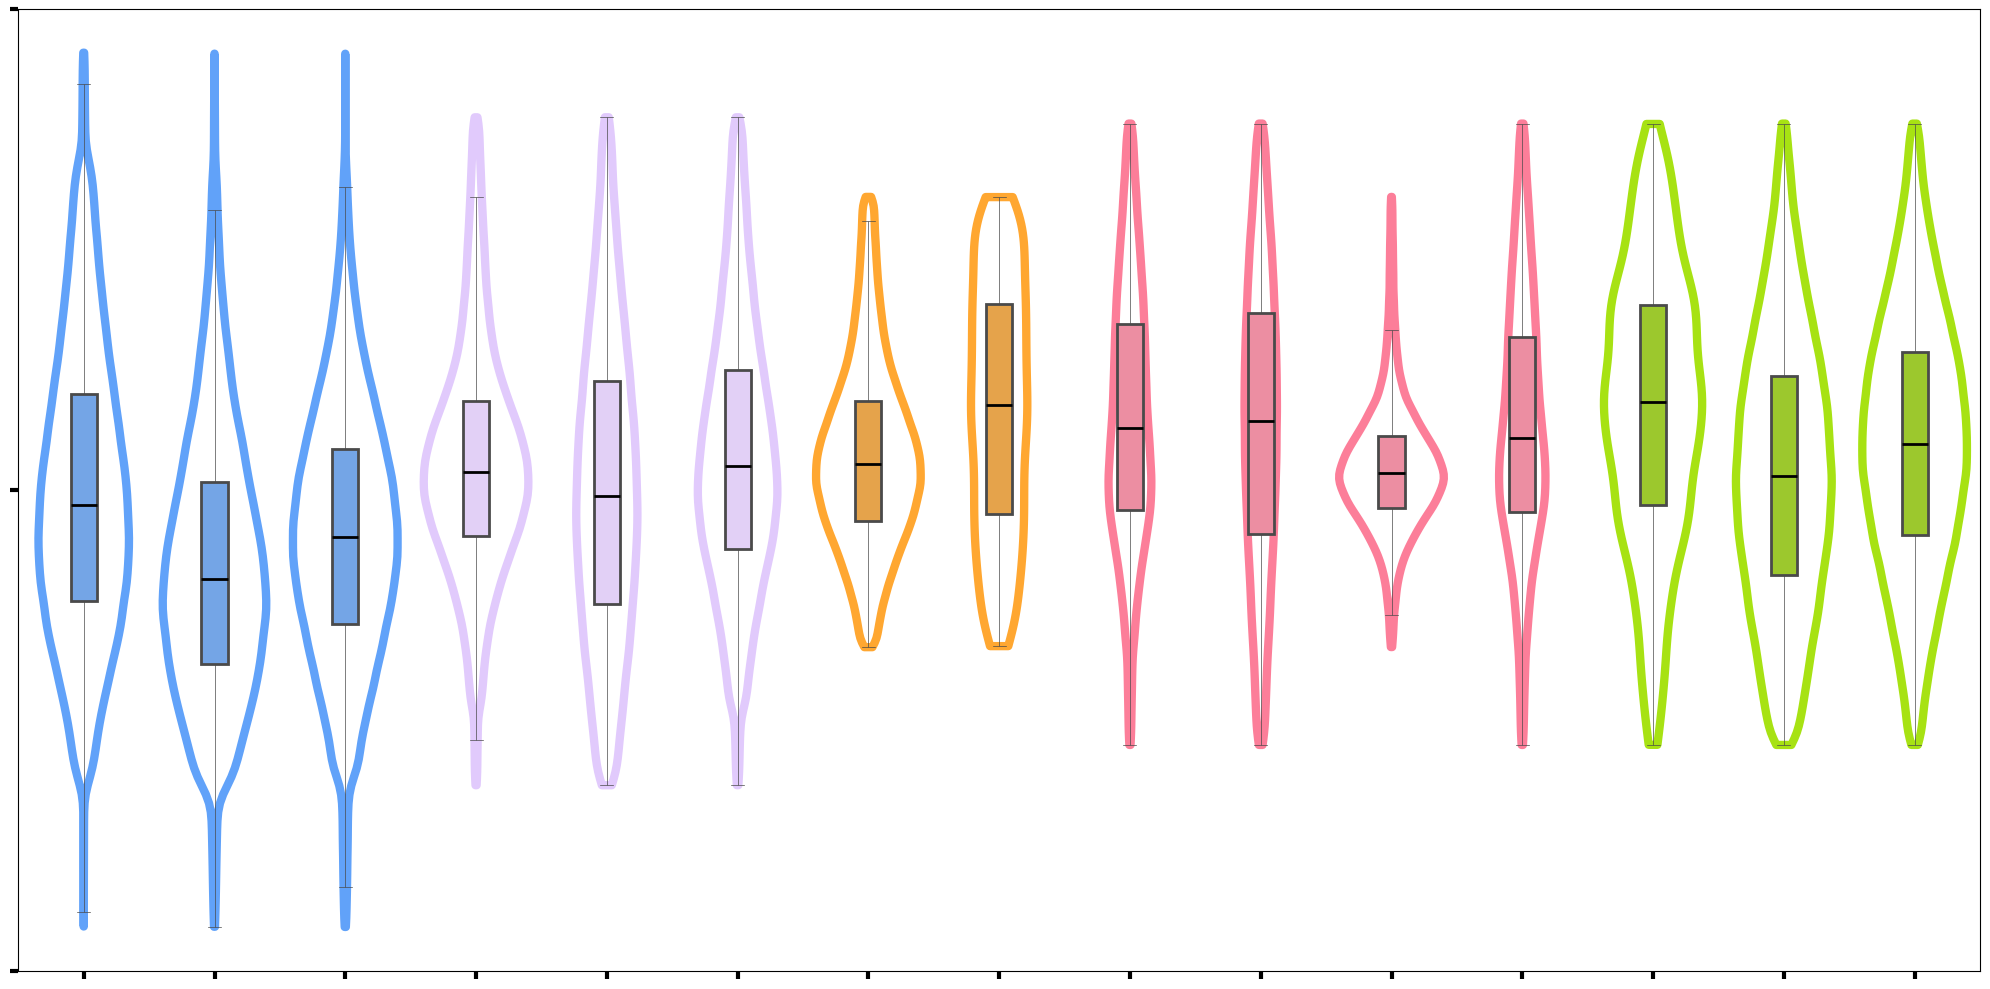

In [7]:



# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        ecoregion_values[key].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Create combined group labels
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define color palette for ecoregions only
# color_map = {
#     'Beaufort_Coastal_Plain': 'salmon',
#     'Brooks_Foothills': 'goldenrod',
#     'Northern_Brooks_Range': 'lightskyblue',
#     'Southern_Brooks_Range': 'lightpink',
#     'Kobuk_Ridges_and_Valley': 'forestgreen'
# }

plt.figure(figsize=(20, 10))

# 1. 创建小提琴图（无填充，只有轮廓）
violins = sns.violinplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,
    linewidth=6,
    saturation=1,
    inner=None,
    cut=0,
    dodge=False,                  # 不分开 violin（整组一个 outline）
    fill=False                    # 无填充
)

# 2. 创建箱线图（叠在 violin 上，填充带透明度）
boxplots = sns.boxplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,        # 初始颜色，后面同步
    width=0.2,
    linewidth=5,
    boxprops={'linewidth': 2, 'alpha': 1},  # 透明度设置在这里
    whiskerprops={'linewidth': 0.5},
    capprops={'linewidth': 0.5},
    medianprops={'color': 'black', 'linewidth': 2},  # 中位线保持黑色
    flierprops={
        'marker': 'o',
        'markersize': 10,
        'markeredgecolor': 'none',
        'alpha': 0.7
    },
    ax=violins                     # 共享 ax，叠在一起
)

# 3. 同步颜色（修复偏灰问题）
group_order = [t.get_text() for t in violins.get_xticklabels()]
ecoregion_per_group = {
    group: df_samples[df_samples['Group'] == group]['Ecoregion'].iloc[0]
    for group in group_order
}

for i, group in enumerate(group_order):
    ecoregion = ecoregion_per_group[group]
    box_index = i * len(nature_colors)
    
    if box_index < len(boxplots.artists):
        box = boxplots.artists[box_index]
        violin_color = box.get_facecolor()[:3]  # ⭐️ 只取 RGB，去掉 alpha

        # 设置 violin outline 颜色
        violins.collections[i].set_edgecolor(violin_color)

        # 设置 boxplot 颜色
        box.set_edgecolor(violin_color)
        box.set_facecolor(box.get_facecolor())  # 保持 box 的 alpha 透明度

        # 须线和端线
        for line in boxplots.lines[box_index * 6 : (box_index + 1) * 6 - 1]:
            line.set_color(violin_color)

        # 异常值（fliers）
        fliers = boxplots.lines[box_index * 6 + 5 :: len(nature_colors) * 6]
        for flier in fliers:
            flier.set_markerfacecolor(violin_color)
            flier.set_markeredgecolor(violin_color)


plt.xlabel('')
plt.ylabel('')
# Get current y-limits for reference (optional)
ymin, ymax = plt.ylim()
ymid = (ymin + ymax) / 2
print("True min:", df_samples['Sampled Values'].min())
print("True min:", df_samples['Sampled Values'].max())


# Set y-ticks for positioning but hide the labels
plt.yticks([ymin, ymid, ymax], ['', '', ''], fontsize=30)

# Set x-ticks and hide labels as well
group_order = [t.get_text() for t in violins.get_xticklabels()]
tick_positions = np.arange(len(group_order))
plt.xticks(tick_positions, ['' for _ in tick_positions], fontsize=30)
# Make tick marks thicker
plt.tick_params(axis='both', width=3, length=6)

# Optional: remove legend if it exists
if hasattr(boxplots, 'legend_') and boxplots.legend_:
    boxplots.legend_.remove()

# 6. 保存图像
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\updated_aviris\violin_plot\d13c_ymax.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# D13C std

In [6]:

# import os
# import rasterio
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# np.random.seed(86)
# nature_colors  = {
#     'Beaufort_Coastal_Plain': '#61A2F9',  
#     'Brooks_Foothills': '#E1CAFC',        
#     'Northern_Brooks_Range': '#FFA731',  
#     'Southern_Brooks_Range': '#FC7E99',   
#     'Kobuk_Ridges_and_Valley': '#A7E213' 
# }


# # Folder containing the .tif files
# tif_folder = r'D:\wenqu\chapter1_2\updated_aviris\AVIRIS_trait_map3\split\d13c\std'

# # Dictionary to map each .tif file to its corresponding ecoregion and sample points
# tif_info = {
#     'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 3330),
#     'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',18325),   
#     'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 18224),  
    
#     'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 2015),
#     'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 18224),  
    
#     'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 3330),   
#     'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18325), 
#     'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18224),
    

#     'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d13c_std_masked.tif':( 'Brooks_Foothills','Arctic_Gravelly_Riverine',36990),
#     'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d13c_std_masked.tif':('Brooks_Foothills','Arctic_Peaty_Glaciated_Upland',36990),
#     'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d13c_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland',22946),
#     # 'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d15n_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1297),
#     # 'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d15n_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1774),


#     'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d13c_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Acidic_Alpine',60712),
#     'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d13c_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Glaciated_Upland',39287),



#     'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site4b_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',7072),
#     'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',16516),
#     'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',6166),
#     # 'Southern_Brooks_Range_Boreal_Peaty_Glaciated_Upland_site4b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Peaty_Glaciated_Upland',8162),
#     'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',17272),
#     'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',4813),
#     'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site4b_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',13730),
#     'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',3492),
#     'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',16523),
#     'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',6249),


#     'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_d13c_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Gravelly_Riverine',36492),
#     'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_d13c_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Peaty_Glaciated_Upland',37131),
#     'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_d13c_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Rocky_Glaciated_Upland',26375)

# }




# # Dictionary to store sampled values
# ecoregion_values = {}

# # Process each .tif file
# for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
#     tif_path = os.path.join(tif_folder, tif_file)
    
#     if n_samples == 0:
#         continue
    
#     with rasterio.open(tif_path) as src:
#         data = src.read(1)
#         valid_mask = ~np.isnan(data)
#         valid_indices = np.column_stack(np.where(valid_mask))
        
#         if len(valid_indices) >= int(n_samples):
#             sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
#         else:
#             sampled_indices = valid_indices
        
#         sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
#         key = (ecoregion, ecolandscape)
#         if key not in ecoregion_values:
#             ecoregion_values[key] = []
#         ecoregion_values[key].extend(sampled_values)

# # Create DataFrame from sampled values
# df_samples = pd.DataFrame({
#     'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
#     'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
#     'Sampled Values': [value for values in ecoregion_values.values() for value in values]
# })

# # Create combined group labels
# df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# # Define color palette for ecoregions only
# # color_map = {
# #     'Beaufort_Coastal_Plain': 'salmon',
# #     'Brooks_Foothills': 'goldenrod',
# #     'Northern_Brooks_Range': 'lightskyblue',
# #     'Southern_Brooks_Range': 'lightpink',
# #     'Kobuk_Ridges_and_Valley': 'forestgreen'
# # }

# plt.figure(figsize=(20, 10))

# # 1. 创建小提琴图（无填充，只有轮廓）
# violins = sns.violinplot(
#     data=df_samples,
#     x='Group',
#     y='Sampled Values',
#     hue='Ecoregion',
#     palette=nature_colors,
#     linewidth=1,
#     saturation=1,
#     inner=None,
#     cut=0,
#     dodge=False,                  # 不分开 violin（整组一个 outline）
#     fill=False                    # 无填充
# )

# # 2. 创建箱线图（叠在 violin 上，填充带透明度）
# boxplots = sns.boxplot(
#     data=df_samples,
#     x='Group',
#     y='Sampled Values',
#     hue='Ecoregion',
#     palette=nature_colors,        # 初始颜色，后面同步
#     width=0.2,
#     linewidth=0.5,
#     boxprops={'linewidth': 0.5, 'alpha': 1},  # 透明度设置在这里
#     whiskerprops={'linewidth': 0.5},
#     capprops={'linewidth': 0.5},
#     medianprops={'color': 'black', 'linewidth': 0.5},  # 中位线保持黑色
#     flierprops={
#         'marker': 'o',
#         'markersize': 4,
#         'markeredgecolor': 'none',
#         'alpha': 0.7
#     },
#     ax=violins                     # 共享 ax，叠在一起
# )

# # 3. 同步颜色（修复偏灰问题）
# group_order = [t.get_text() for t in violins.get_xticklabels()]
# ecoregion_per_group = {
#     group: df_samples[df_samples['Group'] == group]['Ecoregion'].iloc[0]
#     for group in group_order
# }

# for i, group in enumerate(group_order):
#     ecoregion = ecoregion_per_group[group]
#     box_index = i * len(nature_colors)
    
#     if box_index < len(boxplots.artists):
#         box = boxplots.artists[box_index]
#         violin_color = box.get_facecolor()[:3]  # ⭐️ 只取 RGB，去掉 alpha

#         # 设置 violin outline 颜色
#         violins.collections[i].set_edgecolor(violin_color)

#         # 设置 boxplot 颜色
#         box.set_edgecolor(violin_color)
#         box.set_facecolor(box.get_facecolor())  # 保持 box 的 alpha 透明度

#         # 须线和端线
#         for line in boxplots.lines[box_index * 6 : (box_index + 1) * 6 - 1]:
#             line.set_color(violin_color)

#         # 异常值（fliers）
#         fliers = boxplots.lines[box_index * 6 + 5 :: len(nature_colors) * 6]
#         for flier in fliers:
#             flier.set_markerfacecolor(violin_color)
#             flier.set_markeredgecolor(violin_color)


# plt.xlabel('')
# plt.ylabel('')
# plt.yticks(fontsize=10)
# plt.grid(axis='y', linestyle='--', alpha=0.3, linewidth=0.3)
# # Get current tick positions and number of groups
# group_order = [t.get_text() for t in violins.get_xticklabels()]
# tick_positions = np.arange(len(group_order))  # 0, 1, 2, ...

# # Set new numeric labels: 1, 2, 3, ...
# plt.xticks(tick_positions, [str(i+1) for i in tick_positions], fontsize=10)


# # 移除图例
# boxplots.legend_.remove()

# # 6. 保存图像
# plt.tight_layout()
# output_path = r'D:\wenqu\chapter1_2\updated_aviris\violin_plot\d13c_std.png'
# plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
# plt.show()


# D15n ymax

True min: -13.556063652038574
True min: 10.202242851257324


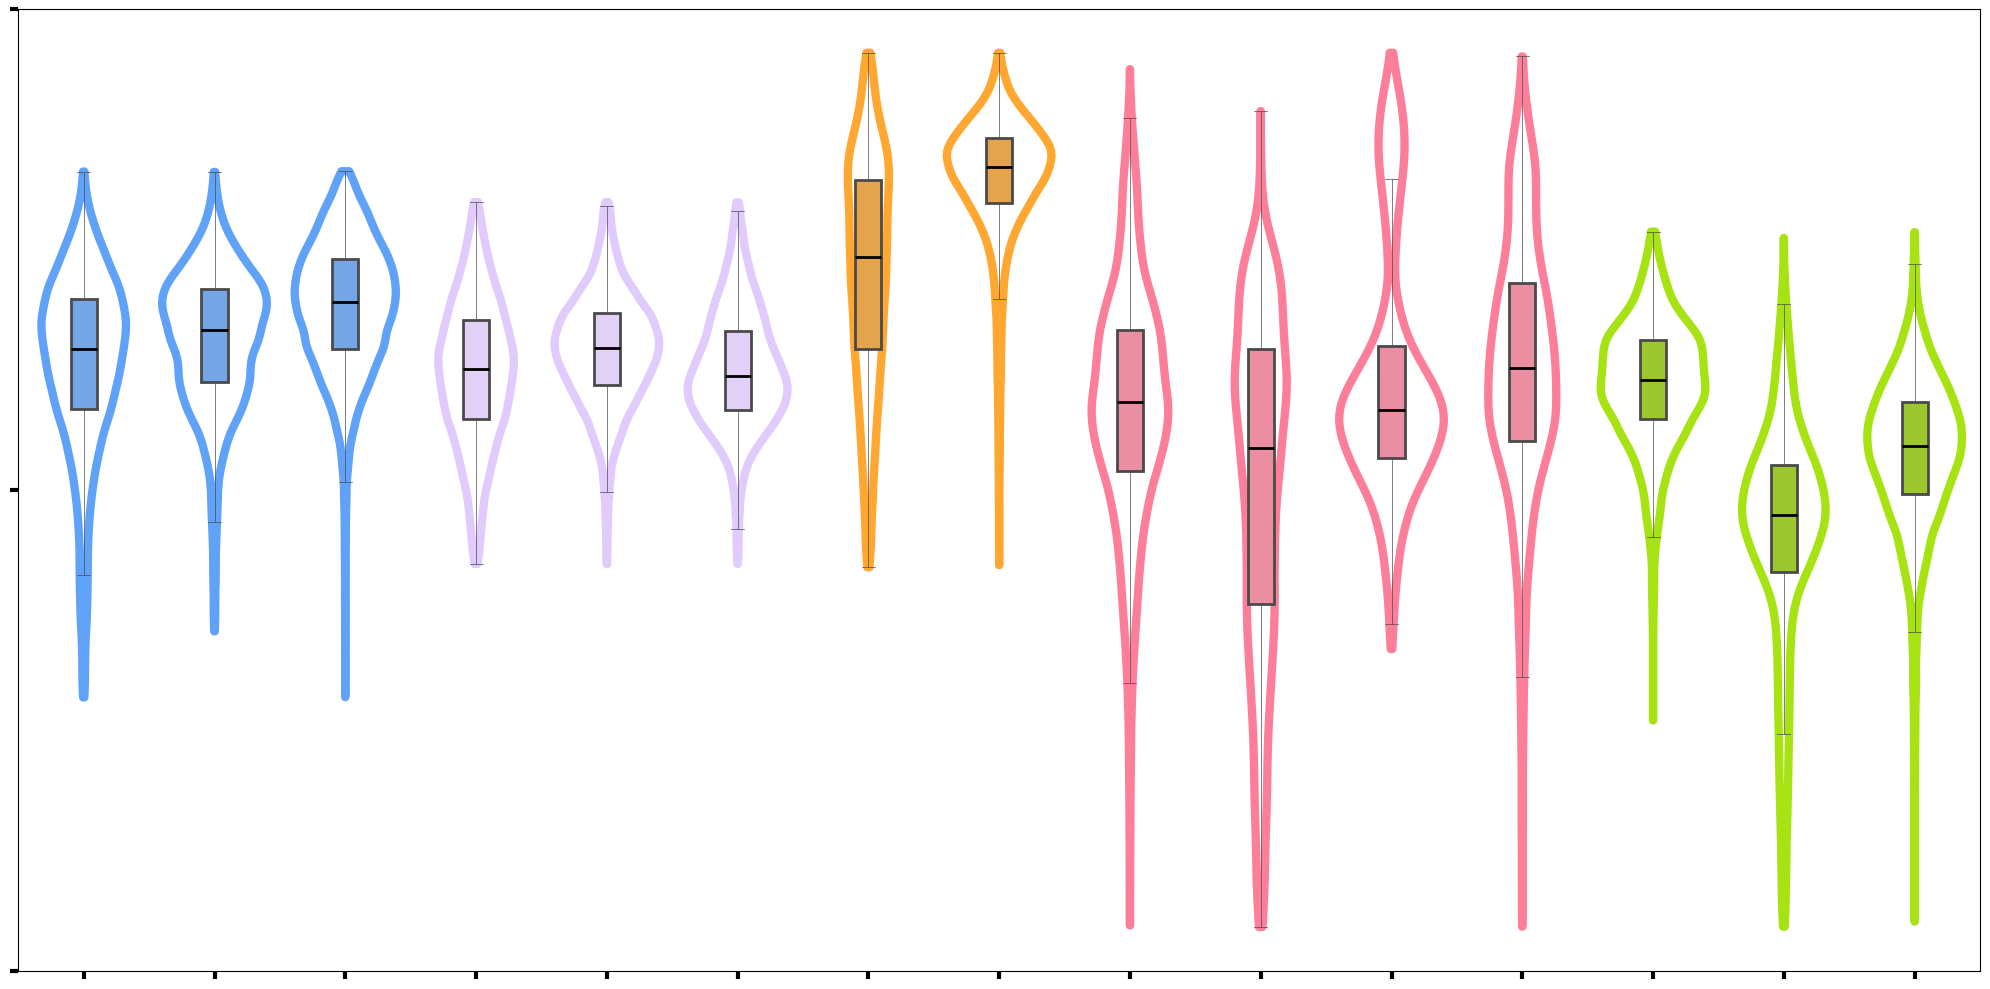

In [8]:

import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(86)
nature_colors  = {
    'Beaufort_Coastal_Plain': '#61A2F9',  
    'Brooks_Foothills': '#E1CAFC',        
    'Northern_Brooks_Range': '#FFA731',  
    'Southern_Brooks_Range': '#FC7E99',   
    'Kobuk_Ridges_and_Valley': '#A7E213' 
}


# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\updated_aviris\AVIRIS_trait_map3\split\d15n\ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d15n_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 3330),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d15n_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',18325),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d15n_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d15n_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 2015),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d15n_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d15n_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 3330),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d15n_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18325), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d15n_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18224),
    

    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d15n_ymax_masked.tif':( 'Brooks_Foothills','Arctic_Gravelly_Riverine',36990),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d15n_ymax_masked.tif':('Brooks_Foothills','Arctic_Peaty_Glaciated_Upland',36990),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d15n_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland',22946),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d15n_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1297),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d15n_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1774),


    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d15n_ymax_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Acidic_Alpine',60712),
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d15n_ymax_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Glaciated_Upland',39287),



    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site4b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',7072),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',16516),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',6166),
    # 'Southern_Brooks_Range_Boreal_Peaty_Glaciated_Upland_site4b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Peaty_Glaciated_Upland',8162),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',17272),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',4813),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site4b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',13730),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',3492),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',16523),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',6249),


    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_d15n_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Gravelly_Riverine',36492),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_d15n_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Peaty_Glaciated_Upland',37131),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_d15n_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Rocky_Glaciated_Upland',26375)

}




# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        ecoregion_values[key].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Create combined group labels
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define color palette for ecoregions only
# color_map = {
#     'Beaufort_Coastal_Plain': 'salmon',
#     'Brooks_Foothills': 'goldenrod',
#     'Northern_Brooks_Range': 'lightskyblue',
#     'Southern_Brooks_Range': 'lightpink',
#     'Kobuk_Ridges_and_Valley': 'forestgreen'
# }

plt.figure(figsize=(20, 10))

# 1. 创建小提琴图（无填充，只有轮廓）
violins = sns.violinplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,
    linewidth=6,
    saturation=1,
    inner=None,
    cut=0,
    dodge=False,                  # 不分开 violin（整组一个 outline）
    fill=False                    # 无填充
)

# 2. 创建箱线图（叠在 violin 上，填充带透明度）
boxplots = sns.boxplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,        # 初始颜色，后面同步
    width=0.2,
    linewidth=5,
    boxprops={'linewidth': 2, 'alpha': 1},  # 透明度设置在这里
    whiskerprops={'linewidth': 0.5},
    capprops={'linewidth': 0.5},
    medianprops={'color': 'black', 'linewidth': 2},  # 中位线保持黑色
    flierprops={
        'marker': 'o',
        'markersize': 10,
        'markeredgecolor': 'none',
        'alpha': 0.7
    },
    ax=violins                     # 共享 ax，叠在一起
)

# 3. 同步颜色（修复偏灰问题）
group_order = [t.get_text() for t in violins.get_xticklabels()]
ecoregion_per_group = {
    group: df_samples[df_samples['Group'] == group]['Ecoregion'].iloc[0]
    for group in group_order
}

for i, group in enumerate(group_order):
    ecoregion = ecoregion_per_group[group]
    box_index = i * len(nature_colors)
    
    if box_index < len(boxplots.artists):
        box = boxplots.artists[box_index]
        violin_color = box.get_facecolor()[:3]  # ⭐️ 只取 RGB，去掉 alpha

        # 设置 violin outline 颜色
        violins.collections[i].set_edgecolor(violin_color)

        # 设置 boxplot 颜色
        box.set_edgecolor(violin_color)
        box.set_facecolor(box.get_facecolor())  # 保持 box 的 alpha 透明度

        # 须线和端线
        for line in boxplots.lines[box_index * 6 : (box_index + 1) * 6 - 1]:
            line.set_color(violin_color)

        # 异常值（fliers）
        fliers = boxplots.lines[box_index * 6 + 5 :: len(nature_colors) * 6]
        for flier in fliers:
            flier.set_markerfacecolor(violin_color)
            flier.set_markeredgecolor(violin_color)


plt.xlabel('')
plt.ylabel('')
# Get current y-limits for reference (optional)
ymin, ymax = plt.ylim()
ymid = (ymin + ymax) / 2
print("True min:", df_samples['Sampled Values'].min())
print("True min:", df_samples['Sampled Values'].max())


# Set y-ticks for positioning but hide the labels
plt.yticks([ymin, ymid, ymax], ['', '', ''], fontsize=30)

# Set x-ticks and hide labels as well
group_order = [t.get_text() for t in violins.get_xticklabels()]
tick_positions = np.arange(len(group_order))
plt.xticks(tick_positions, ['' for _ in tick_positions], fontsize=30)
# Make tick marks thicker
plt.tick_params(axis='both', width=3, length=6)

# Optional: remove legend if it exists
if hasattr(boxplots, 'legend_') and boxplots.legend_:
    boxplots.legend_.remove()

# 6. 保存图像
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\updated_aviris\violin_plot\d15n_ymax.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
plt.show()


# D15N std

True min: -0.061786554753780365
True min: 15.770957946777344


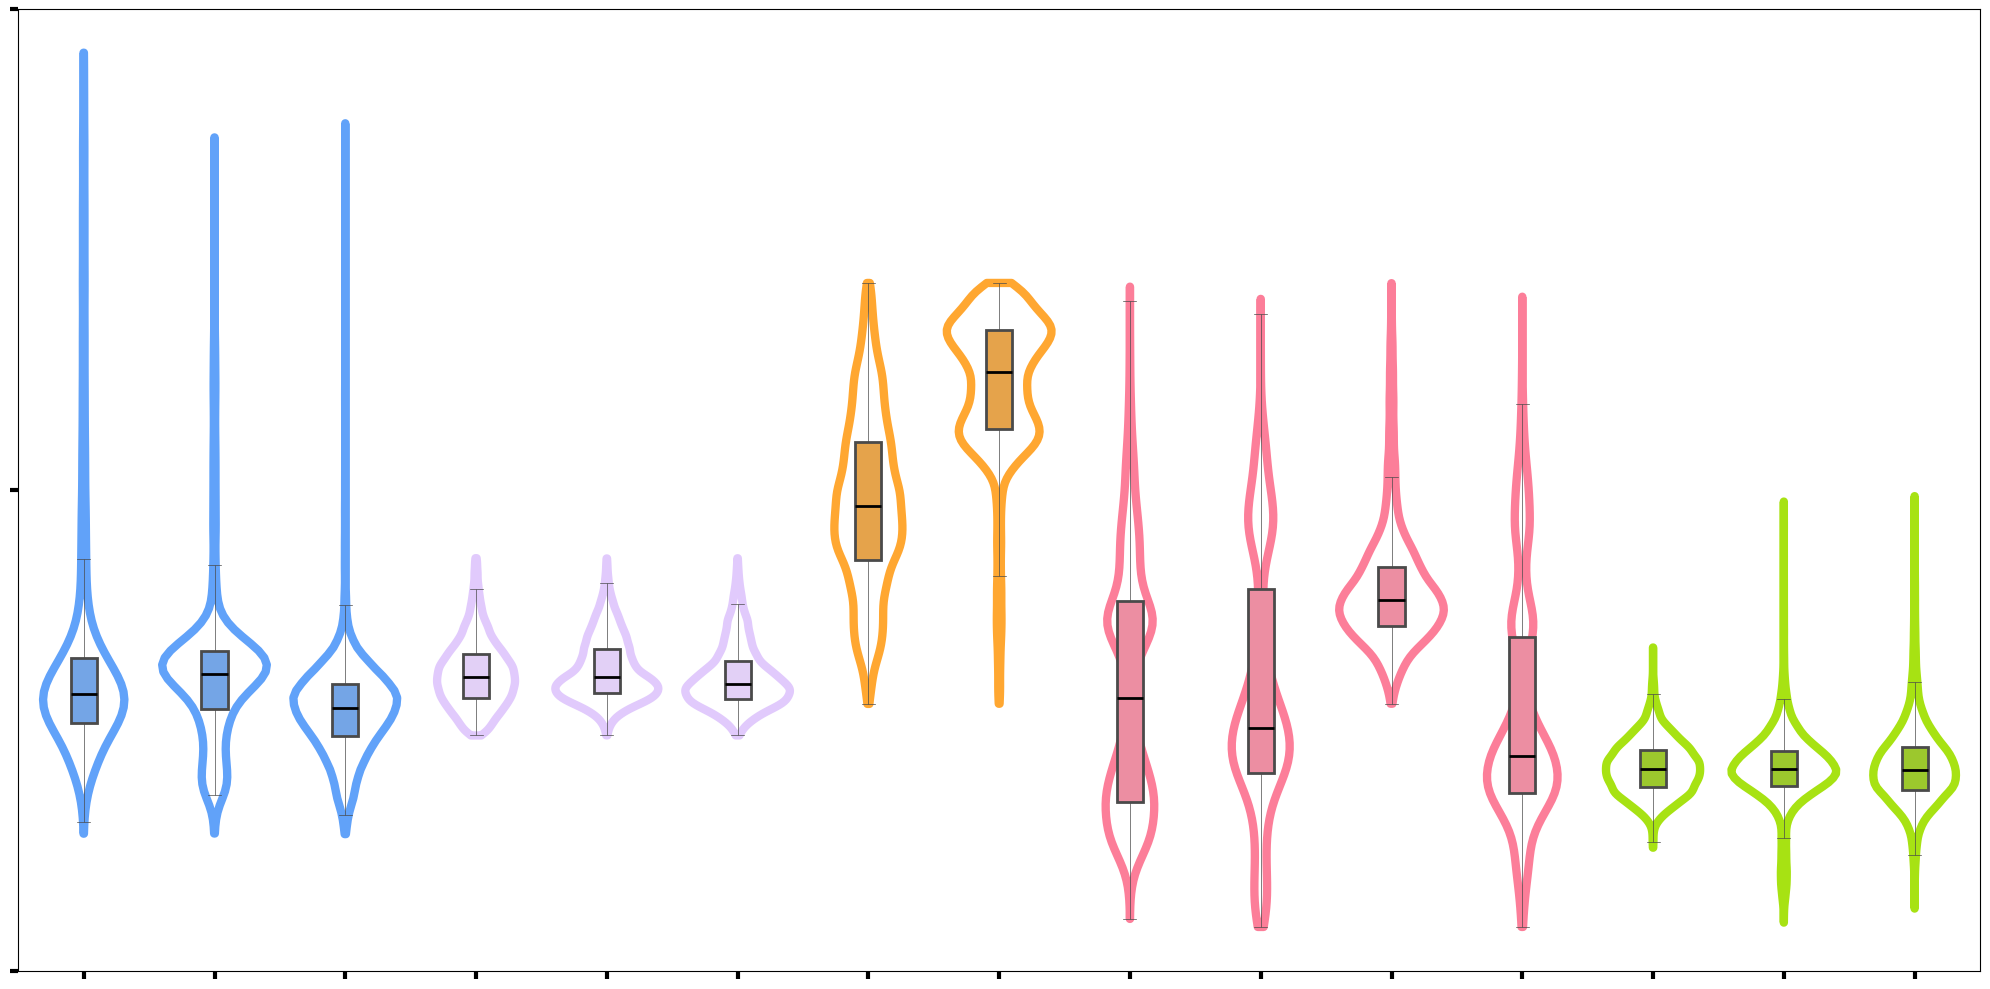

In [9]:

import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(86)
nature_colors  = {
    'Beaufort_Coastal_Plain': '#61A2F9',  
    'Brooks_Foothills': '#E1CAFC',        
    'Northern_Brooks_Range': '#FFA731',  
    'Southern_Brooks_Range': '#FC7E99',   
    'Kobuk_Ridges_and_Valley': '#A7E213' 
}


# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\updated_aviris\AVIRIS_trait_map3\split\d15n\std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d15n_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 3330),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d15n_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',18325),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d15n_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d15n_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 2015),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d15n_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d15n_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 3330),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d15n_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18325), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d15n_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18224),
    

    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d15n_std_masked.tif':( 'Brooks_Foothills','Arctic_Gravelly_Riverine',36990),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d15n_std_masked.tif':('Brooks_Foothills','Arctic_Peaty_Glaciated_Upland',36990),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d15n_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland',22946),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d15n_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1297),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d15n_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1774),


    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d15n_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Acidic_Alpine',60712),
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d15n_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Glaciated_Upland',39287),



    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site4b_d15n_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',7072),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_d15n_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',16516),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d15n_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',6166),
    # 'Southern_Brooks_Range_Boreal_Peaty_Glaciated_Upland_site4b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Peaty_Glaciated_Upland',8162),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_d15n_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',17272),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d15n_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',4813),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site4b_d15n_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',13730),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d15n_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',3492),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_d15n_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',16523),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d15n_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',6249),


    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_d15n_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Gravelly_Riverine',36492),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_d15n_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Peaty_Glaciated_Upland',37131),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_d15n_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Rocky_Glaciated_Upland',26375)

}




# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        ecoregion_values[key].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Create combined group labels
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define color palette for ecoregions only
# color_map = {
#     'Beaufort_Coastal_Plain': 'salmon',
#     'Brooks_Foothills': 'goldenrod',
#     'Northern_Brooks_Range': 'lightskyblue',
#     'Southern_Brooks_Range': 'lightpink',
#     'Kobuk_Ridges_and_Valley': 'forestgreen'
# }

plt.figure(figsize=(20, 10))

# 1. 创建小提琴图（无填充，只有轮廓）
violins = sns.violinplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,
    linewidth=6,
    saturation=1,
    inner=None,
    cut=0,
    dodge=False,                  # 不分开 violin（整组一个 outline）
    fill=False                    # 无填充
)

# 2. 创建箱线图（叠在 violin 上，填充带透明度）
boxplots = sns.boxplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,        # 初始颜色，后面同步
    width=0.2,
    linewidth=5,
    boxprops={'linewidth': 2, 'alpha': 1},  # 透明度设置在这里
    whiskerprops={'linewidth': 0.5},
    capprops={'linewidth': 0.5},
    medianprops={'color': 'black', 'linewidth': 2},  # 中位线保持黑色
    flierprops={
        'marker': 'o',
        'markersize': 10,
        'markeredgecolor': 'none',
        'alpha': 0.7
    },
    ax=violins                     # 共享 ax，叠在一起
)

# 3. 同步颜色（修复偏灰问题）
group_order = [t.get_text() for t in violins.get_xticklabels()]
ecoregion_per_group = {
    group: df_samples[df_samples['Group'] == group]['Ecoregion'].iloc[0]
    for group in group_order
}

for i, group in enumerate(group_order):
    ecoregion = ecoregion_per_group[group]
    box_index = i * len(nature_colors)
    
    if box_index < len(boxplots.artists):
        box = boxplots.artists[box_index]
        violin_color = box.get_facecolor()[:3]  # ⭐️ 只取 RGB，去掉 alpha

        # 设置 violin outline 颜色
        violins.collections[i].set_edgecolor(violin_color)

        # 设置 boxplot 颜色
        box.set_edgecolor(violin_color)
        box.set_facecolor(box.get_facecolor())  # 保持 box 的 alpha 透明度

        # 须线和端线
        for line in boxplots.lines[box_index * 6 : (box_index + 1) * 6 - 1]:
            line.set_color(violin_color)

        # 异常值（fliers）
        fliers = boxplots.lines[box_index * 6 + 5 :: len(nature_colors) * 6]
        for flier in fliers:
            flier.set_markerfacecolor(violin_color)
            flier.set_markeredgecolor(violin_color)


plt.xlabel('')
plt.ylabel('')
# Get current y-limits for reference (optional)
ymin, ymax = plt.ylim()
ymid = (ymin + ymax) / 2
print("True min:", df_samples['Sampled Values'].min())
print("True min:", df_samples['Sampled Values'].max())


# Set y-ticks for positioning but hide the labels
plt.yticks([ymin, ymid, ymax], ['', '', ''], fontsize=30)

# Set x-ticks and hide labels as well
group_order = [t.get_text() for t in violins.get_xticklabels()]
tick_positions = np.arange(len(group_order))
plt.xticks(tick_positions, ['' for _ in tick_positions], fontsize=30)
# Make tick marks thicker
plt.tick_params(axis='both', width=3, length=6)

# Optional: remove legend if it exists
if hasattr(boxplots, 'legend_') and boxplots.legend_:
    boxplots.legend_.remove()

# 6. 保存图像
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\updated_aviris\violin_plot\d15n_std.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
plt.show()


# SLA ymax

True min: 2.411769151687622
True min: 5.784032821655273


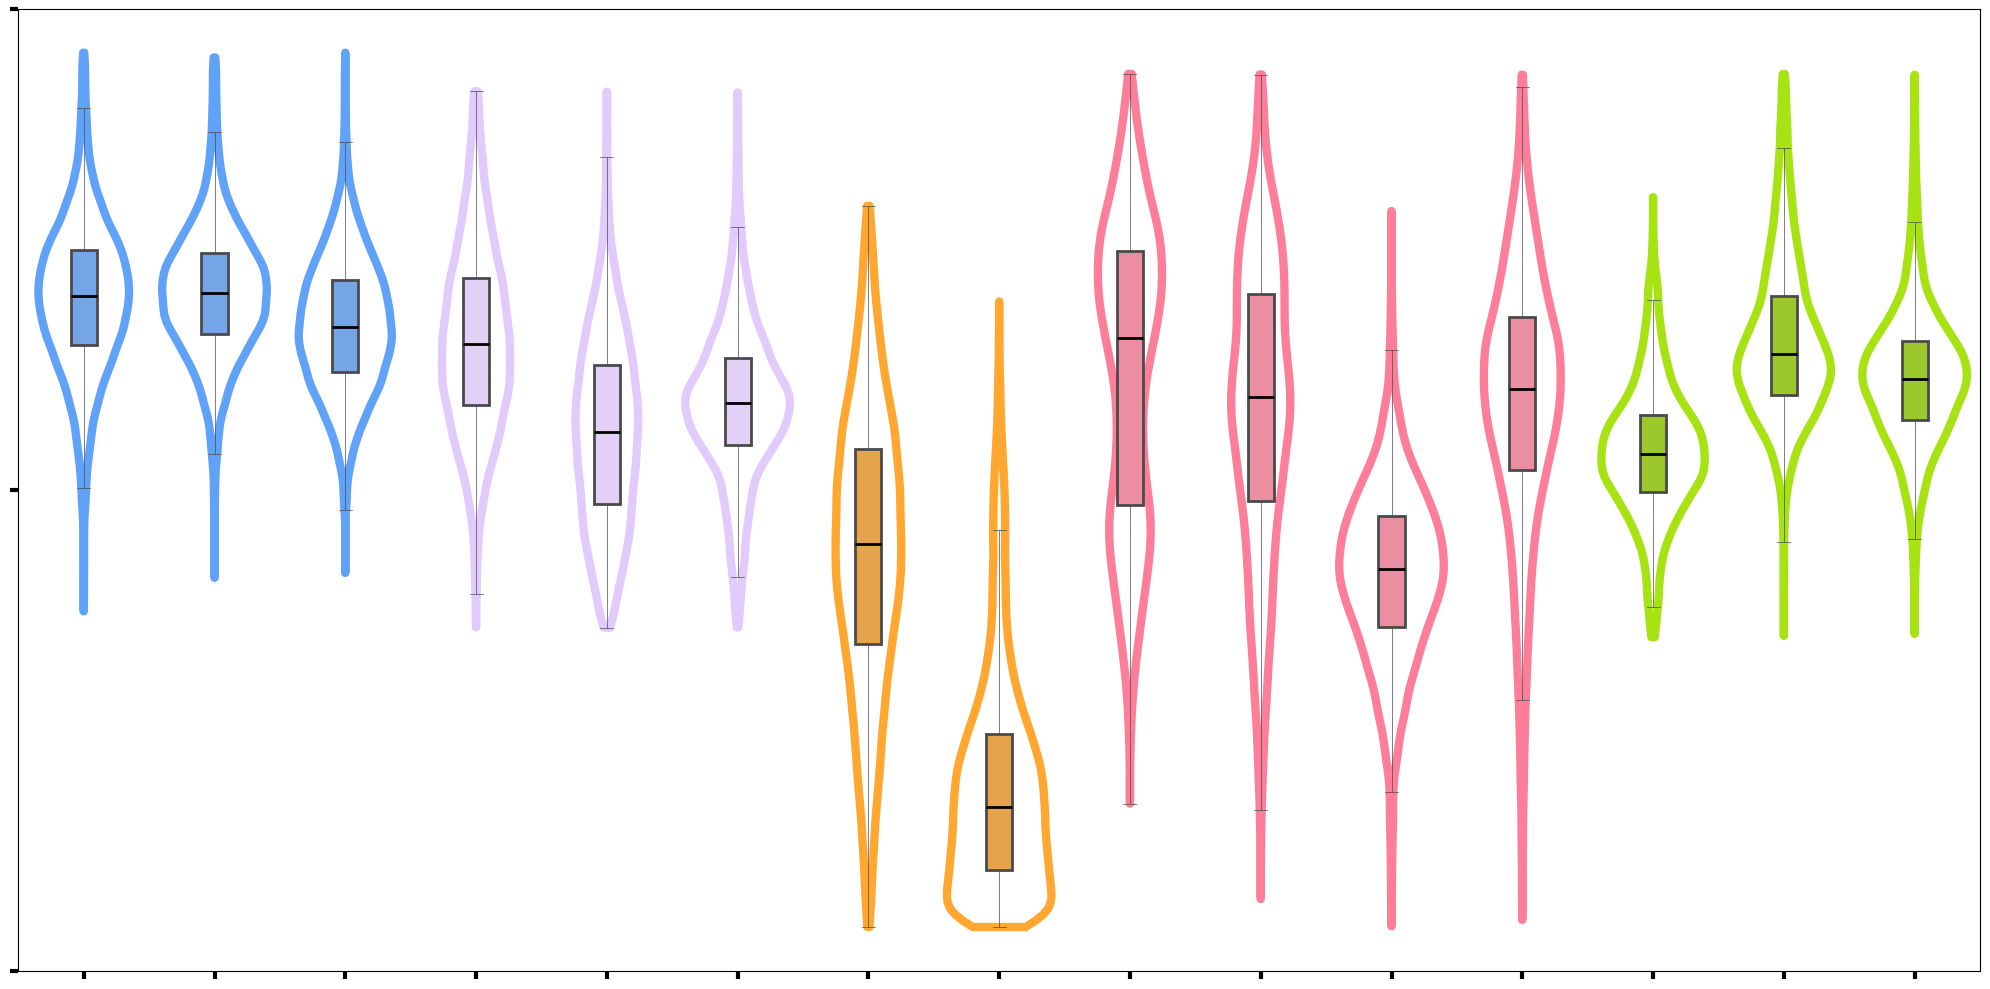

In [10]:

import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(86)
nature_colors  = {
    'Beaufort_Coastal_Plain': '#61A2F9',  
    'Brooks_Foothills': '#E1CAFC',        
    'Northern_Brooks_Range': '#FFA731',  
    'Southern_Brooks_Range': '#FC7E99',   
    'Kobuk_Ridges_and_Valley': '#A7E213' 
}


# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\updated_aviris\AVIRIS_trait_map3\split\sla\ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_sla_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 3330),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_sla_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',18325),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_sla_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_sla_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 2015),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_sla_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_sla_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 3330),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_sla_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18325), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_sla_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18224),
    

    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_sla_ymax_masked.tif':( 'Brooks_Foothills','Arctic_Gravelly_Riverine',36990),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_sla_ymax_masked.tif':('Brooks_Foothills','Arctic_Peaty_Glaciated_Upland',36990),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_sla_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland',22946),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site4a_sla_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1297),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site6c_sla_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1774),


    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_sla_ymax_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Acidic_Alpine',60712),
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_sla_ymax_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Glaciated_Upland',39287),



    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site4b_sla_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',7072),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_sla_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',16516),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_sla_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',6166),
    # 'Southern_Brooks_Range_Boreal_Peaty_Glaciated_Upland_site4b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Peaty_Glaciated_Upland',8162),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_sla_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',17272),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_sla_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',4813),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site4b_sla_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',13730),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_sla_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',3492),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_sla_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',16523),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_sla_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',6249),


    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_sla_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Gravelly_Riverine',36492),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_sla_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Peaty_Glaciated_Upland',37131),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_sla_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Rocky_Glaciated_Upland',26375)

}




# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        ecoregion_values[key].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Create combined group labels
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define color palette for ecoregions only
# color_map = {
#     'Beaufort_Coastal_Plain': 'salmon',
#     'Brooks_Foothills': 'goldenrod',
#     'Northern_Brooks_Range': 'lightskyblue',
#     'Southern_Brooks_Range': 'lightpink',
#     'Kobuk_Ridges_and_Valley': 'forestgreen'
# }

plt.figure(figsize=(20, 10))

# 1. 创建小提琴图（无填充，只有轮廓）
violins = sns.violinplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,
    linewidth=6,
    saturation=1,
    inner=None,
    cut=0,
    dodge=False,                  # 不分开 violin（整组一个 outline）
    fill=False                    # 无填充
)

# 2. 创建箱线图（叠在 violin 上，填充带透明度）
boxplots = sns.boxplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,        # 初始颜色，后面同步
    width=0.2,
    linewidth=5,
    boxprops={'linewidth': 2, 'alpha': 1},  # 透明度设置在这里
    whiskerprops={'linewidth': 0.5},
    capprops={'linewidth': 0.5},
    medianprops={'color': 'black', 'linewidth': 2},  # 中位线保持黑色
    flierprops={
        'marker': 'o',
        'markersize': 10,
        'markeredgecolor': 'none',
        'alpha': 0.7
    },
    ax=violins                     # 共享 ax，叠在一起
)

# 3. 同步颜色（修复偏灰问题）
group_order = [t.get_text() for t in violins.get_xticklabels()]
ecoregion_per_group = {
    group: df_samples[df_samples['Group'] == group]['Ecoregion'].iloc[0]
    for group in group_order
}

for i, group in enumerate(group_order):
    ecoregion = ecoregion_per_group[group]
    box_index = i * len(nature_colors)
    
    if box_index < len(boxplots.artists):
        box = boxplots.artists[box_index]
        violin_color = box.get_facecolor()[:3]  # ⭐️ 只取 RGB，去掉 alpha

        # 设置 violin outline 颜色
        violins.collections[i].set_edgecolor(violin_color)

        # 设置 boxplot 颜色
        box.set_edgecolor(violin_color)
        box.set_facecolor(box.get_facecolor())  # 保持 box 的 alpha 透明度

        # 须线和端线
        for line in boxplots.lines[box_index * 6 : (box_index + 1) * 6 - 1]:
            line.set_color(violin_color)

        # 异常值（fliers）
        fliers = boxplots.lines[box_index * 6 + 5 :: len(nature_colors) * 6]
        for flier in fliers:
            flier.set_markerfacecolor(violin_color)
            flier.set_markeredgecolor(violin_color)


plt.xlabel('')
plt.ylabel('')
# Get current y-limits for reference (optional)
ymin, ymax = plt.ylim()
ymid = (ymin + ymax) / 2
print("True min:", df_samples['Sampled Values'].min())
print("True min:", df_samples['Sampled Values'].max())

# Set y-ticks for positioning but hide the labels
plt.yticks([ymin, ymid, ymax], ['', '', ''], fontsize=30)

# Set x-ticks and hide labels as well
group_order = [t.get_text() for t in violins.get_xticklabels()]
tick_positions = np.arange(len(group_order))
plt.xticks(tick_positions, ['' for _ in tick_positions], fontsize=30)
# Make tick marks thicker
plt.tick_params(axis='both', width=3, length=6)

# Optional: remove legend if it exists
if hasattr(boxplots, 'legend_') and boxplots.legend_:
    boxplots.legend_.remove()

# 6. 保存图像
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\updated_aviris\violin_plot\sla_ymax.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
plt.show()


# SLA std

True min: 0.1518133133649826
True min: 1.2002633810043335


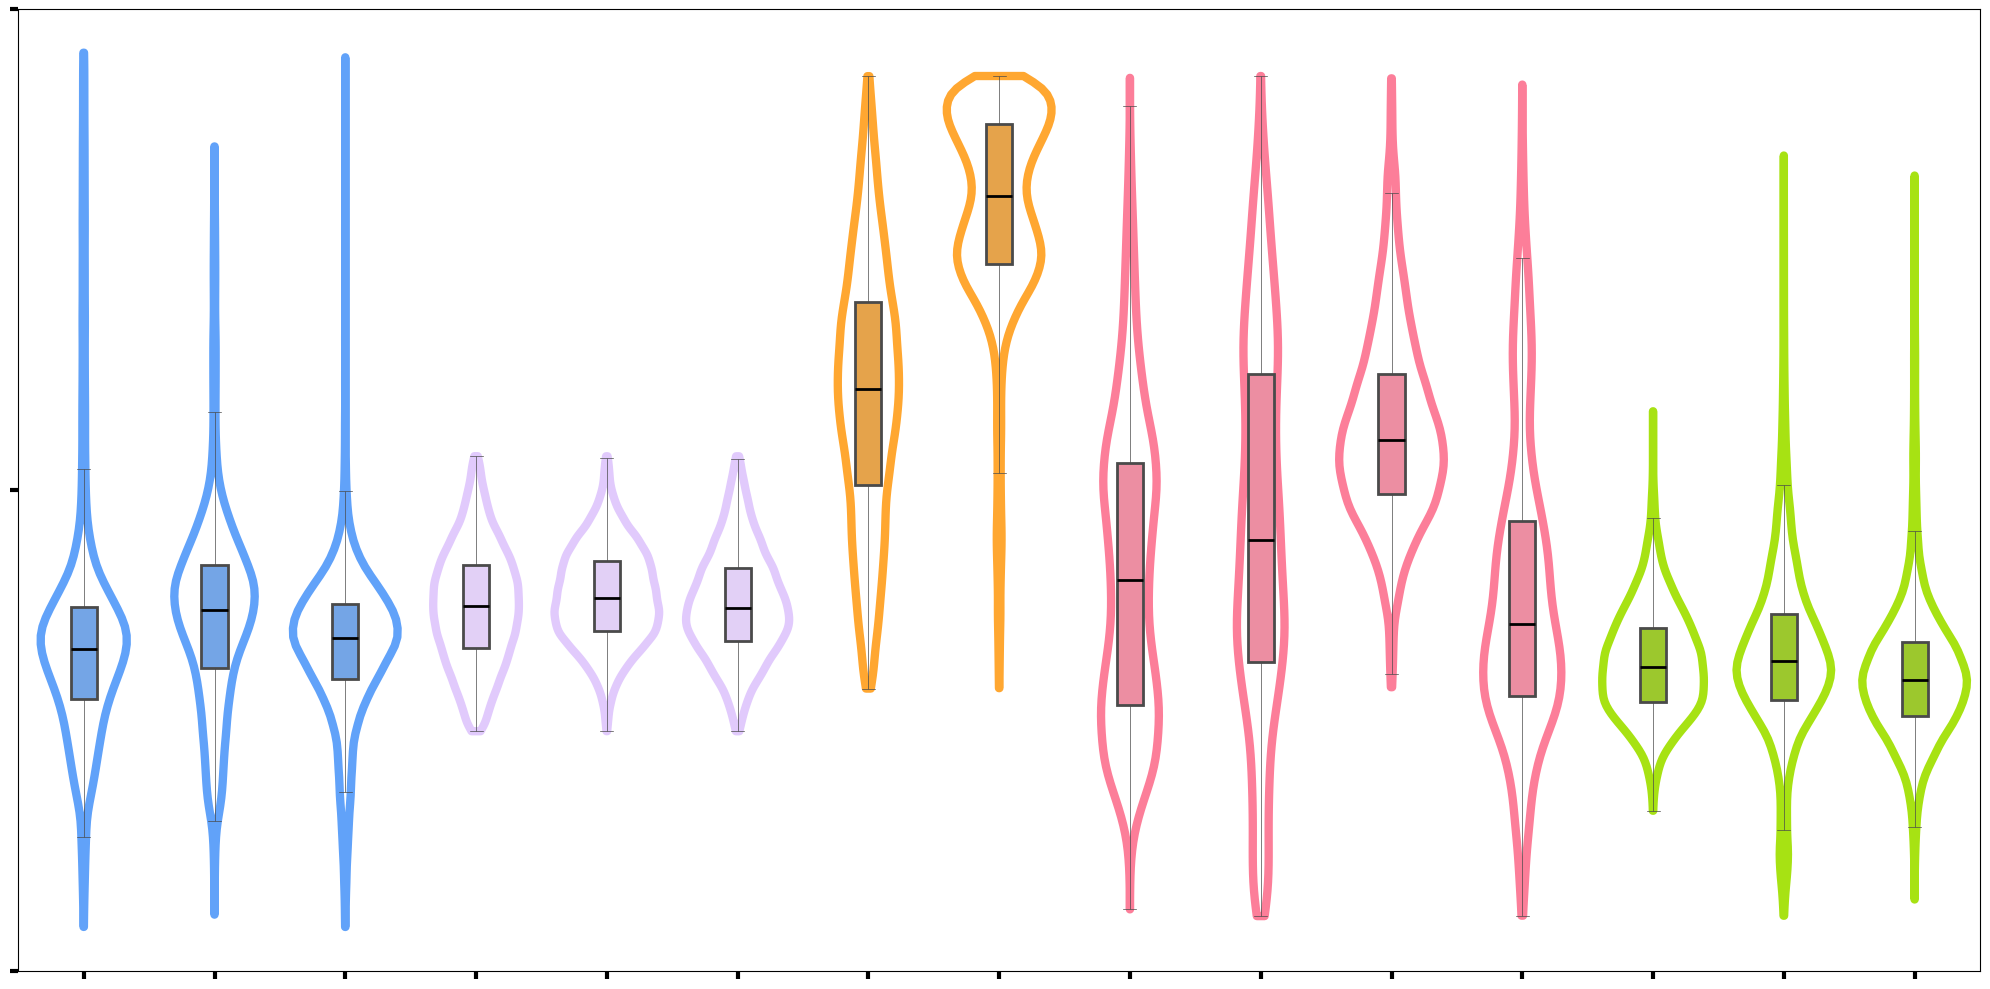

In [11]:

import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(86)
nature_colors  = {
    'Beaufort_Coastal_Plain': '#61A2F9',  
    'Brooks_Foothills': '#E1CAFC',        
    'Northern_Brooks_Range': '#FFA731',  
    'Southern_Brooks_Range': '#FC7E99',   
    'Kobuk_Ridges_and_Valley': '#A7E213' 
}


# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\updated_aviris\AVIRIS_trait_map3\split\sla\std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_sla_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 3330),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_sla_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',18325),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_sla_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_sla_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 2015),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_sla_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_sla_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 3330),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_sla_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18325), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_sla_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18224),
    

    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_sla_std_masked.tif':( 'Brooks_Foothills','Arctic_Gravelly_Riverine',36990),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_sla_std_masked.tif':('Brooks_Foothills','Arctic_Peaty_Glaciated_Upland',36990),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_sla_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland',22946),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site4a_sla_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1297),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site6c_sla_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1774),


    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_sla_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Acidic_Alpine',60712),
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_sla_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Glaciated_Upland',39287),



    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site4b_sla_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',7072),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_sla_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',16516),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_sla_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',6166),
    # 'Southern_Brooks_Range_Boreal_Peaty_Glaciated_Upland_site4b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Peaty_Glaciated_Upland',8162),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_sla_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',17272),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_sla_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',4813),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site4b_sla_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',13730),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_sla_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',3492),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_sla_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',16523),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_sla_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',6249),


    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_sla_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Gravelly_Riverine',36492),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_sla_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Peaty_Glaciated_Upland',37131),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_sla_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Rocky_Glaciated_Upland',26375)

}




# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        ecoregion_values[key].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Create combined group labels
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define color palette for ecoregions only
# color_map = {
#     'Beaufort_Coastal_Plain': 'salmon',
#     'Brooks_Foothills': 'goldenrod',
#     'Northern_Brooks_Range': 'lightskyblue',
#     'Southern_Brooks_Range': 'lightpink',
#     'Kobuk_Ridges_and_Valley': 'forestgreen'
# }

plt.figure(figsize=(20, 10))

# 1. 创建小提琴图（无填充，只有轮廓）
violins = sns.violinplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,
    linewidth=6,
    saturation=1,
    inner=None,
    cut=0,
    dodge=False,                  # 不分开 violin（整组一个 outline）
    fill=False                    # 无填充
)

# 2. 创建箱线图（叠在 violin 上，填充带透明度）
boxplots = sns.boxplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,        # 初始颜色，后面同步
    width=0.2,
    linewidth=5,
    boxprops={'linewidth': 2, 'alpha': 1},  # 透明度设置在这里
    whiskerprops={'linewidth': 0.5},
    capprops={'linewidth': 0.5},
    medianprops={'color': 'black', 'linewidth': 2},  # 中位线保持黑色
    flierprops={
        'marker': 'o',
        'markersize': 10,
        'markeredgecolor': 'none',
        'alpha': 0.7
    },
    ax=violins                     # 共享 ax，叠在一起
)

# 3. 同步颜色（修复偏灰问题）
group_order = [t.get_text() for t in violins.get_xticklabels()]
ecoregion_per_group = {
    group: df_samples[df_samples['Group'] == group]['Ecoregion'].iloc[0]
    for group in group_order
}

for i, group in enumerate(group_order):
    ecoregion = ecoregion_per_group[group]
    box_index = i * len(nature_colors)
    
    if box_index < len(boxplots.artists):
        box = boxplots.artists[box_index]
        violin_color = box.get_facecolor()[:3]  # ⭐️ 只取 RGB，去掉 alpha

        # 设置 violin outline 颜色
        violins.collections[i].set_edgecolor(violin_color)

        # 设置 boxplot 颜色
        box.set_edgecolor(violin_color)
        box.set_facecolor(box.get_facecolor())  # 保持 box 的 alpha 透明度

        # 须线和端线
        for line in boxplots.lines[box_index * 6 : (box_index + 1) * 6 - 1]:
            line.set_color(violin_color)

        # 异常值（fliers）
        fliers = boxplots.lines[box_index * 6 + 5 :: len(nature_colors) * 6]
        for flier in fliers:
            flier.set_markerfacecolor(violin_color)
            flier.set_markeredgecolor(violin_color)


plt.xlabel('')
plt.ylabel('')
# Get current y-limits for reference (optional)
ymin, ymax = plt.ylim()
ymid = (ymin + ymax) / 2
print("True min:", df_samples['Sampled Values'].min())
print("True min:", df_samples['Sampled Values'].max())

# Set y-ticks for positioning but hide the labels
plt.yticks([ymin, ymid, ymax], ['', '', ''], fontsize=30)

# Set x-ticks and hide labels as well
group_order = [t.get_text() for t in violins.get_xticklabels()]
tick_positions = np.arange(len(group_order))
plt.xticks(tick_positions, ['' for _ in tick_positions], fontsize=30)
# Make tick marks thicker
plt.tick_params(axis='both', width=3, length=6)

# Optional: remove legend if it exists
if hasattr(boxplots, 'legend_') and boxplots.legend_:
    boxplots.legend_.remove()

# 6. 保存图像
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\updated_aviris\violin_plot\sla_std.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
plt.show()


# LDMC Ymax

True min: -2.8900997638702393
True min: 4.206233024597168


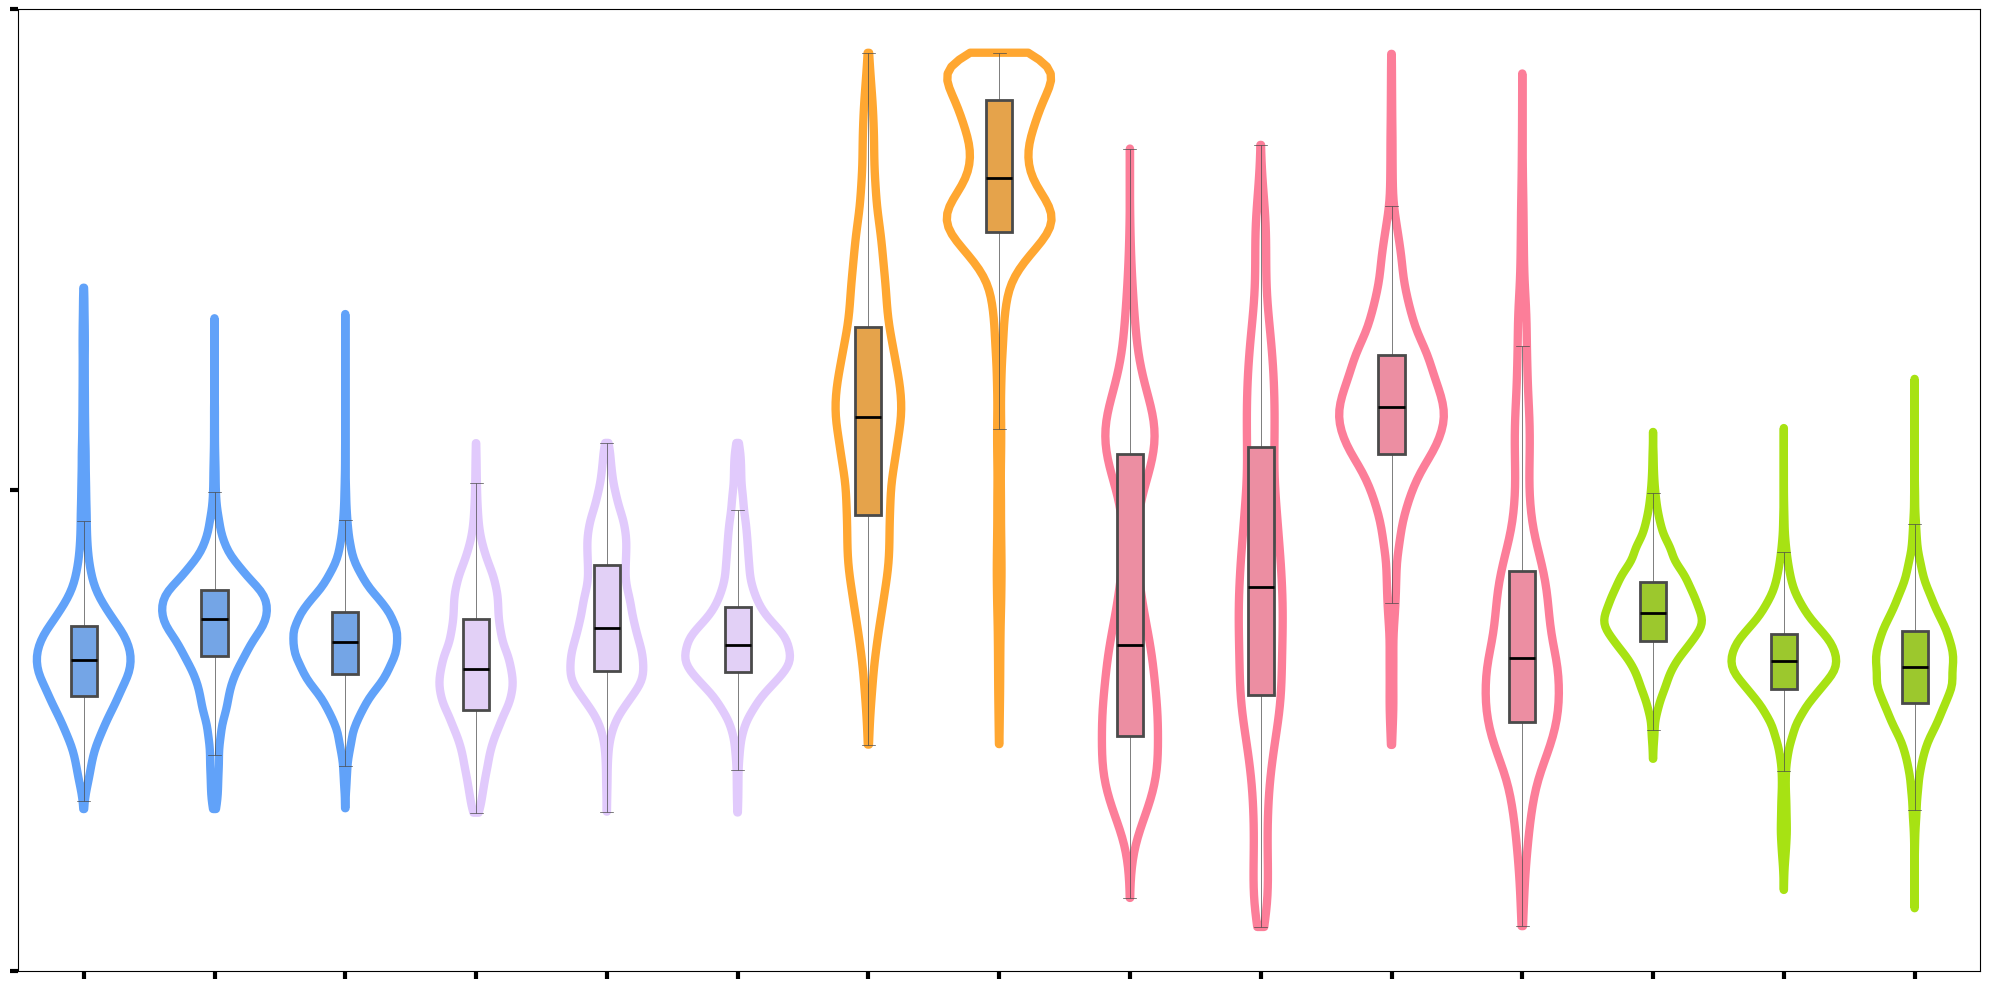

In [12]:

import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(86)
nature_colors  = {
    'Beaufort_Coastal_Plain': '#61A2F9',  
    'Brooks_Foothills': '#E1CAFC',        
    'Northern_Brooks_Range': '#FFA731',  
    'Southern_Brooks_Range': '#FC7E99',   
    'Kobuk_Ridges_and_Valley': '#A7E213' 
}


# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\updated_aviris\AVIRIS_trait_map3\split\ldmc\ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_ldmc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 3330),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_ldmc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',18325),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_ldmc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_ldmc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 2015),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_ldmc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_ldmc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 3330),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_ldmc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18325), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_ldmc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18224),
    

    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_ldmc_ymax_masked.tif':( 'Brooks_Foothills','Arctic_Gravelly_Riverine',36990),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_ldmc_ymax_masked.tif':('Brooks_Foothills','Arctic_Peaty_Glaciated_Upland',36990),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_ldmc_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland',22946),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site4a_ldmc_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1297),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site6c_ldmc_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1774),


    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_ldmc_ymax_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Acidic_Alpine',60712),
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_ldmc_ymax_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Glaciated_Upland',39287),



    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site4b_ldmc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',7072),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_ldmc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',16516),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_ldmc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',6166),
    # 'Southern_Brooks_Range_Boreal_Peaty_Glaciated_Upland_site4b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Peaty_Glaciated_Upland',8162),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_ldmc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',17272),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_ldmc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',4813),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site4b_ldmc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',13730),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_ldmc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',3492),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_ldmc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',16523),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_ldmc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',6249),


    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_ldmc_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Gravelly_Riverine',36492),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_ldmc_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Peaty_Glaciated_Upland',37131),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_ldmc_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Rocky_Glaciated_Upland',26375)

}




# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        ecoregion_values[key].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Create combined group labels
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define color palette for ecoregions only
# color_map = {
#     'Beaufort_Coastal_Plain': 'salmon',
#     'Brooks_Foothills': 'goldenrod',
#     'Northern_Brooks_Range': 'lightskyblue',
#     'Southern_Brooks_Range': 'lightpink',
#     'Kobuk_Ridges_and_Valley': 'forestgreen'
# }

plt.figure(figsize=(20, 10))

# 1. 创建小提琴图（无填充，只有轮廓）
violins = sns.violinplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,
    linewidth=6,
    saturation=1,
    inner=None,
    cut=0,
    dodge=False,                  # 不分开 violin（整组一个 outline）
    fill=False                    # 无填充
)

# 2. 创建箱线图（叠在 violin 上，填充带透明度）
boxplots = sns.boxplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,        # 初始颜色，后面同步
    width=0.2,
    linewidth=5,
    boxprops={'linewidth': 2, 'alpha': 1},  # 透明度设置在这里
    whiskerprops={'linewidth': 0.5},
    capprops={'linewidth': 0.5},
    medianprops={'color': 'black', 'linewidth': 2},  # 中位线保持黑色
    flierprops={
        'marker': 'o',
        'markersize': 10,
        'markeredgecolor': 'none',
        'alpha': 0.7
    },
    ax=violins                     # 共享 ax，叠在一起
)

# 3. 同步颜色（修复偏灰问题）
group_order = [t.get_text() for t in violins.get_xticklabels()]
ecoregion_per_group = {
    group: df_samples[df_samples['Group'] == group]['Ecoregion'].iloc[0]
    for group in group_order
}

for i, group in enumerate(group_order):
    ecoregion = ecoregion_per_group[group]
    box_index = i * len(nature_colors)
    
    if box_index < len(boxplots.artists):
        box = boxplots.artists[box_index]
        violin_color = box.get_facecolor()[:3]  # ⭐️ 只取 RGB，去掉 alpha

        # 设置 violin outline 颜色
        violins.collections[i].set_edgecolor(violin_color)

        # 设置 boxplot 颜色
        box.set_edgecolor(violin_color)
        box.set_facecolor(box.get_facecolor())  # 保持 box 的 alpha 透明度

        # 须线和端线
        for line in boxplots.lines[box_index * 6 : (box_index + 1) * 6 - 1]:
            line.set_color(violin_color)

        # 异常值（fliers）
        fliers = boxplots.lines[box_index * 6 + 5 :: len(nature_colors) * 6]
        for flier in fliers:
            flier.set_markerfacecolor(violin_color)
            flier.set_markeredgecolor(violin_color)


plt.xlabel('')
plt.ylabel('')
# Get current y-limits for reference (optional)
ymin, ymax = plt.ylim()
ymid = (ymin + ymax) / 2
print("True min:", df_samples['Sampled Values'].min())
print("True min:", df_samples['Sampled Values'].max())

# Set y-ticks for positioning but hide the labels
plt.yticks([ymin, ymid, ymax], ['', '', ''], fontsize=30)

# Set x-ticks and hide labels as well
group_order = [t.get_text() for t in violins.get_xticklabels()]
tick_positions = np.arange(len(group_order))
plt.xticks(tick_positions, ['' for _ in tick_positions], fontsize=30)
# Make tick marks thicker
plt.tick_params(axis='both', width=3, length=6)

# Optional: remove legend if it exists
if hasattr(boxplots, 'legend_') and boxplots.legend_:
    boxplots.legend_.remove()

# 6. 保存图像
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\updated_aviris\violin_plot\ldmc_ymax.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
plt.show()


# LDMC STD

True min: -0.11288851499557495
True min: 2.1346888542175293


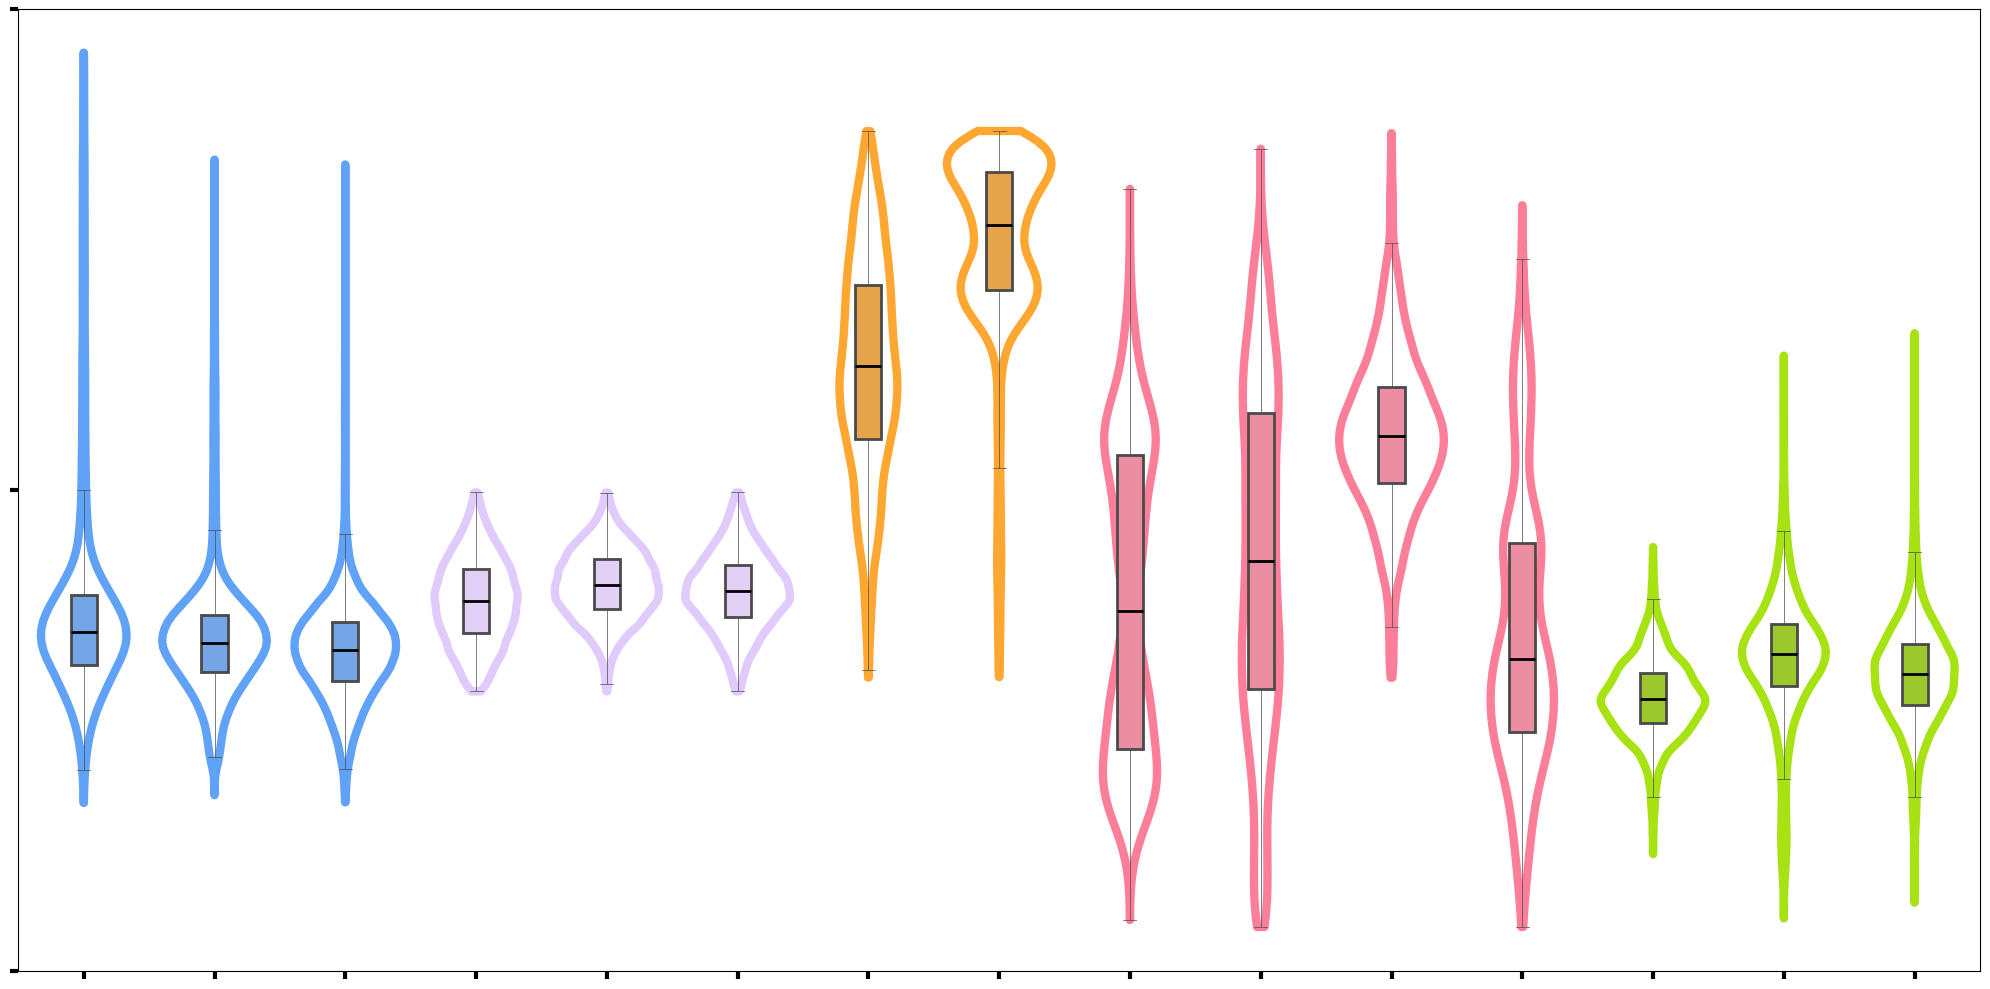

In [13]:

import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(86)
nature_colors  = {
    'Beaufort_Coastal_Plain': '#61A2F9',  
    'Brooks_Foothills': '#E1CAFC',        
    'Northern_Brooks_Range': '#FFA731',  
    'Southern_Brooks_Range': '#FC7E99',   
    'Kobuk_Ridges_and_Valley': '#A7E213' 
}


# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\updated_aviris\AVIRIS_trait_map3\split\ldmc\std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_ldmc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 3330),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_ldmc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',18325),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_ldmc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_ldmc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 2015),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_ldmc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_ldmc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 3330),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_ldmc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18325), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_ldmc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18224),
    

    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_ldmc_std_masked.tif':( 'Brooks_Foothills','Arctic_Gravelly_Riverine',36990),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_ldmc_std_masked.tif':('Brooks_Foothills','Arctic_Peaty_Glaciated_Upland',36990),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_ldmc_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland',22946),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site4a_ldmc_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1297),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site6c_ldmc_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1774),


    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_ldmc_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Acidic_Alpine',60712),
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_ldmc_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Glaciated_Upland',39287),



    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site4b_ldmc_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',7072),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_ldmc_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',16516),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_ldmc_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',6166),
    # 'Southern_Brooks_Range_Boreal_Peaty_Glaciated_Upland_site4b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Peaty_Glaciated_Upland',8162),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_ldmc_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',17272),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_ldmc_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',4813),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site4b_ldmc_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',13730),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_ldmc_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',3492),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_ldmc_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',16523),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_ldmc_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',6249),


    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_ldmc_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Gravelly_Riverine',36492),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_ldmc_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Peaty_Glaciated_Upland',37131),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_ldmc_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Rocky_Glaciated_Upland',26375)

}




# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        ecoregion_values[key].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Create combined group labels
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define color palette for ecoregions only
# color_map = {
#     'Beaufort_Coastal_Plain': 'salmon',
#     'Brooks_Foothills': 'goldenrod',
#     'Northern_Brooks_Range': 'lightskyblue',
#     'Southern_Brooks_Range': 'lightpink',
#     'Kobuk_Ridges_and_Valley': 'forestgreen'
# }

plt.figure(figsize=(20, 10))

# 1. 创建小提琴图（无填充，只有轮廓）
violins = sns.violinplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,
    linewidth=6,
    saturation=1,
    inner=None,
    cut=0,
    dodge=False,                  # 不分开 violin（整组一个 outline）
    fill=False                    # 无填充
)

# 2. 创建箱线图（叠在 violin 上，填充带透明度）
boxplots = sns.boxplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,        # 初始颜色，后面同步
    width=0.2,
    linewidth=5,
    boxprops={'linewidth': 2, 'alpha': 1},  # 透明度设置在这里
    whiskerprops={'linewidth': 0.5},
    capprops={'linewidth': 0.5},
    medianprops={'color': 'black', 'linewidth': 2},  # 中位线保持黑色
    flierprops={
        'marker': 'o',
        'markersize': 10,
        'markeredgecolor': 'none',
        'alpha': 0.7
    },
    ax=violins                     # 共享 ax，叠在一起
)

# 3. 同步颜色（修复偏灰问题）
group_order = [t.get_text() for t in violins.get_xticklabels()]
ecoregion_per_group = {
    group: df_samples[df_samples['Group'] == group]['Ecoregion'].iloc[0]
    for group in group_order
}

for i, group in enumerate(group_order):
    ecoregion = ecoregion_per_group[group]
    box_index = i * len(nature_colors)
    
    if box_index < len(boxplots.artists):
        box = boxplots.artists[box_index]
        violin_color = box.get_facecolor()[:3]  # ⭐️ 只取 RGB，去掉 alpha

        # 设置 violin outline 颜色
        violins.collections[i].set_edgecolor(violin_color)

        # 设置 boxplot 颜色
        box.set_edgecolor(violin_color)
        box.set_facecolor(box.get_facecolor())  # 保持 box 的 alpha 透明度

        # 须线和端线
        for line in boxplots.lines[box_index * 6 : (box_index + 1) * 6 - 1]:
            line.set_color(violin_color)

        # 异常值（fliers）
        fliers = boxplots.lines[box_index * 6 + 5 :: len(nature_colors) * 6]
        for flier in fliers:
            flier.set_markerfacecolor(violin_color)
            flier.set_markeredgecolor(violin_color)


plt.xlabel('')
plt.ylabel('')
# Get current y-limits
# Get current y-limits for reference (optional)
ymin, ymax = plt.ylim()
ymid = (ymin + ymax) / 2
print("True min:", df_samples['Sampled Values'].min())
print("True min:", df_samples['Sampled Values'].max())

# Set y-ticks for positioning but hide the labels
plt.yticks([ymin, ymid, ymax], ['', '', ''], fontsize=30)

# Set x-ticks and hide labels as well
group_order = [t.get_text() for t in violins.get_xticklabels()]
tick_positions = np.arange(len(group_order))
plt.xticks(tick_positions, ['' for _ in tick_positions], fontsize=30)
# Make tick marks thicker
plt.tick_params(axis='both', width=3, length=6)

# Optional: remove legend if it exists
if hasattr(boxplots, 'legend_') and boxplots.legend_:
    boxplots.legend_.remove()

# 6. 保存图像
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\updated_aviris\violin_plot\ldmc_std.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
plt.show()


# PC Ymax

True min: 3.6483569145202637
True min: 4.324598789215088


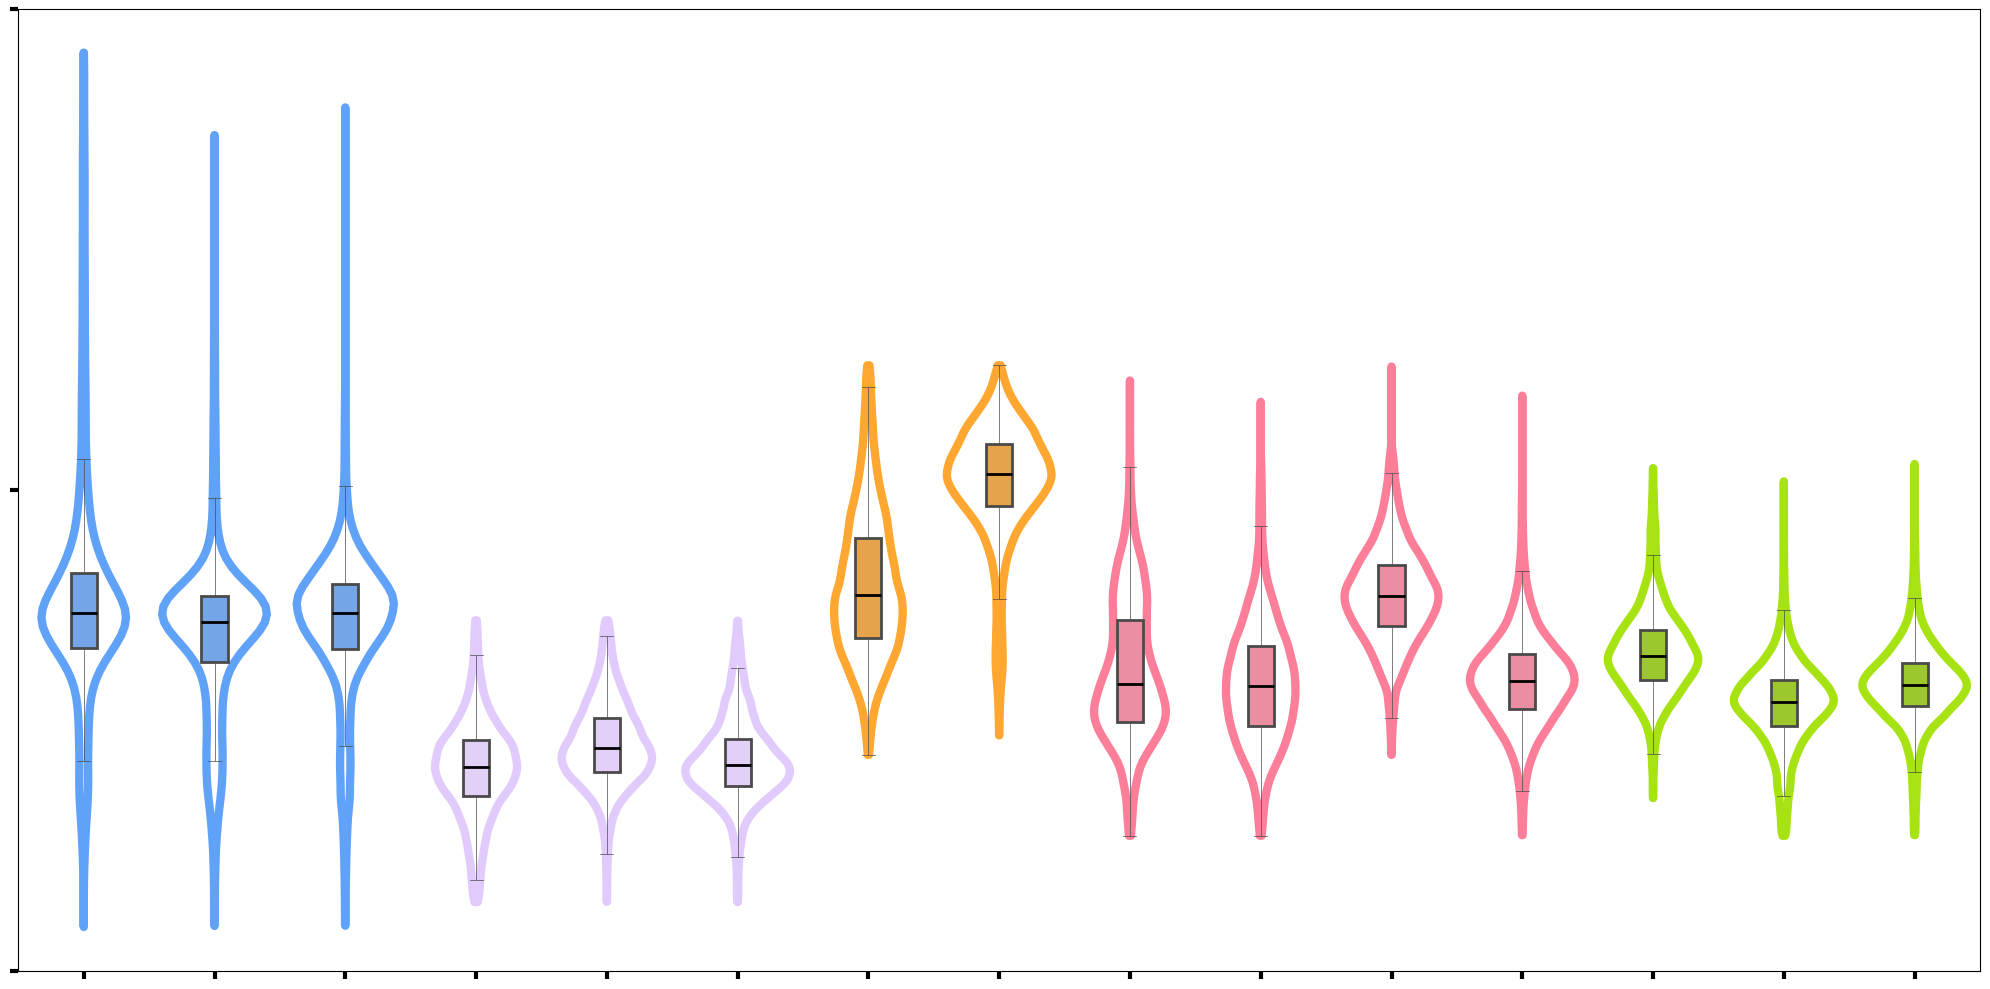

In [15]:

import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(86)
nature_colors  = {
    'Beaufort_Coastal_Plain': '#61A2F9',  
    'Brooks_Foothills': '#E1CAFC',        
    'Northern_Brooks_Range': '#FFA731',  
    'Southern_Brooks_Range': '#FC7E99',   
    'Kobuk_Ridges_and_Valley': '#A7E213' 
}


# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\updated_aviris\AVIRIS_trait_map3\split\pc\ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_pc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 3330),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_pc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',18325),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_pc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_pc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 2015),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_pc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_pc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 3330),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_pc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18325), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_pc_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18224),
    

    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_pc_ymax_masked.tif':( 'Brooks_Foothills','Arctic_Gravelly_Riverine',36990),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_pc_ymax_masked.tif':('Brooks_Foothills','Arctic_Peaty_Glaciated_Upland',36990),

    
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_pc_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland',22946),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site4a_pc_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1297),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site6c_pc_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1774),


    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_pc_ymax_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Acidic_Alpine',60712),
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_pc_ymax_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Glaciated_Upland',39287),



    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site4b_pc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',7072),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_pc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',16516),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_pc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',6166),
    # 'Southern_Brooks_Range_Boreal_Peaty_Glaciated_Upland_site4b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Peaty_Glaciated_Upland',8162),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_pc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',17272),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_pc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',4813),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site4b_pc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',13730),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_pc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',3492),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_pc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',16523),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_pc_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',6249),


    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_pc_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Gravelly_Riverine',36492),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_pc_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Peaty_Glaciated_Upland',37131),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_pc_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Rocky_Glaciated_Upland',26375)

}




# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        ecoregion_values[key].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Create combined group labels
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define color palette for ecoregions only
# color_map = {
#     'Beaufort_Coastal_Plain': 'salmon',
#     'Brooks_Foothills': 'goldenrod',
#     'Northern_Brooks_Range': 'lightskyblue',
#     'Southern_Brooks_Range': 'lightpink',
#     'Kobuk_Ridges_and_Valley': 'forestgreen'
# }

plt.figure(figsize=(20, 10))

# 1. 创建小提琴图（无填充，只有轮廓）
violins = sns.violinplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,
    linewidth=6,
    saturation=1,
    inner=None,
    cut=0,
    dodge=False,                  # 不分开 violin（整组一个 outline）
    fill=False                    # 无填充
)

# 2. 创建箱线图（叠在 violin 上，填充带透明度）
boxplots = sns.boxplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,        # 初始颜色，后面同步
    width=0.2,
    linewidth=5,
    boxprops={'linewidth': 2, 'alpha': 1},  # 透明度设置在这里
    whiskerprops={'linewidth': 0.5},
    capprops={'linewidth': 0.5},
    medianprops={'color': 'black', 'linewidth': 2},  # 中位线保持黑色
    flierprops={
        'marker': 'o',
        'markersize': 10,
        'markeredgecolor': 'none',
        'alpha': 0.7
    },
    ax=violins                     # 共享 ax，叠在一起
)

# 3. 同步颜色（修复偏灰问题）
group_order = [t.get_text() for t in violins.get_xticklabels()]
ecoregion_per_group = {
    group: df_samples[df_samples['Group'] == group]['Ecoregion'].iloc[0]
    for group in group_order
}

for i, group in enumerate(group_order):
    ecoregion = ecoregion_per_group[group]
    box_index = i * len(nature_colors)
    
    if box_index < len(boxplots.artists):
        box = boxplots.artists[box_index]
        violin_color = box.get_facecolor()[:3]  # ⭐️ 只取 RGB，去掉 alpha

        # 设置 violin outline 颜色
        violins.collections[i].set_edgecolor(violin_color)

        # 设置 boxplot 颜色
        box.set_edgecolor(violin_color)
        box.set_facecolor(box.get_facecolor())  # 保持 box 的 alpha 透明度

        # 须线和端线
        for line in boxplots.lines[box_index * 6 : (box_index + 1) * 6 - 1]:
            line.set_color(violin_color)

        # 异常值（fliers）
        fliers = boxplots.lines[box_index * 6 + 5 :: len(nature_colors) * 6]
        for flier in fliers:
            flier.set_markerfacecolor(violin_color)
            flier.set_markeredgecolor(violin_color)


plt.xlabel('')
plt.ylabel('')
# Get current y-limits for reference (optional)
ymin, ymax = plt.ylim()
ymid = (ymin + ymax) / 2
print("True min:", df_samples['Sampled Values'].min())
print("True min:", df_samples['Sampled Values'].max())

# Set y-ticks for positioning but hide the labels
plt.yticks([ymin, ymid, ymax], ['', '', ''], fontsize=30)

# Set x-ticks and hide labels as well
group_order = [t.get_text() for t in violins.get_xticklabels()]
tick_positions = np.arange(len(group_order))
plt.xticks(tick_positions, ['' for _ in tick_positions], fontsize=30)
# Make tick marks thicker
plt.tick_params(axis='both', width=3, length=6)

# Optional: remove legend if it exists
if hasattr(boxplots, 'legend_') and boxplots.legend_:
    boxplots.legend_.remove()

# 6. 保存图像
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\updated_aviris\violin_plot\pc_ymax.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
plt.show()


# pc std

True min: 0.019862288609147072
True min: 0.2768680453300476


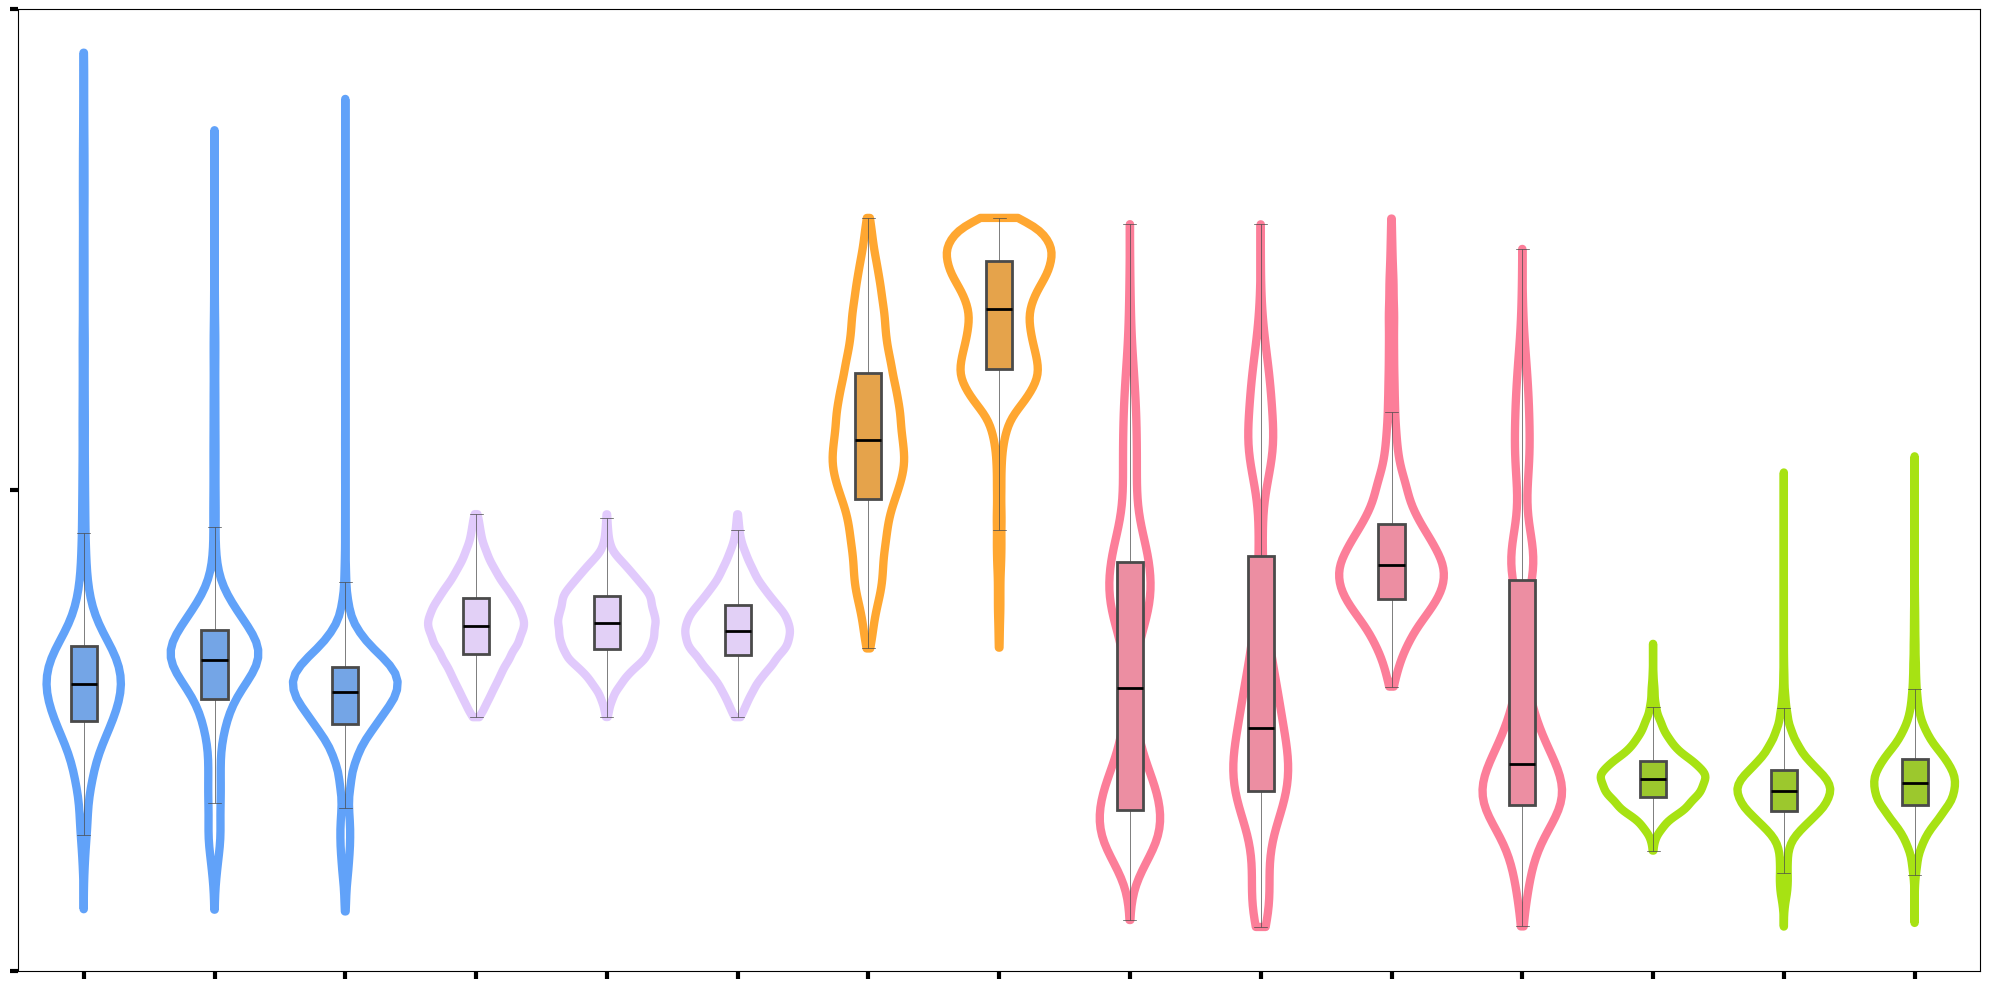

In [16]:

import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(86)
nature_colors  = {
    'Beaufort_Coastal_Plain': '#61A2F9',  
    'Brooks_Foothills': '#E1CAFC',        
    'Northern_Brooks_Range': '#FFA731',  
    'Southern_Brooks_Range': '#FC7E99',   
    'Kobuk_Ridges_and_Valley': '#A7E213' 
}


# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\updated_aviris\AVIRIS_trait_map3\split\pc\std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_pc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 3330),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_pc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',18325),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_pc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_pc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 2015),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_pc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_pc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 3330),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_pc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18325), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_pc_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18224),
    

    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_pc_std_masked.tif':( 'Brooks_Foothills','Arctic_Gravelly_Riverine',36990),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_pc_std_masked.tif':('Brooks_Foothills','Arctic_Peaty_Glaciated_Upland',36990),

    
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_pc_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland',22946),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site4a_pc_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1297),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site6c_pc_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1774),


    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_pc_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Acidic_Alpine',60712),
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_pc_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Glaciated_Upland',39287),



    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site4b_pc_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',7072),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_pc_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',16516),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_pc_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',6166),
    # 'Southern_Brooks_Range_Boreal_Peaty_Glaciated_Upland_site4b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Peaty_Glaciated_Upland',8162),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_pc_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',17272),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_pc_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',4813),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site4b_pc_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',13730),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_pc_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',3492),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_pc_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',16523),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_pc_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',6249),


    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_pc_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Gravelly_Riverine',36492),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_pc_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Peaty_Glaciated_Upland',37131),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_pc_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Rocky_Glaciated_Upland',26375)

}




# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        ecoregion_values[key].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Create combined group labels
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define color palette for ecoregions only
# color_map = {
#     'Beaufort_Coastal_Plain': 'salmon',
#     'Brooks_Foothills': 'goldenrod',
#     'Northern_Brooks_Range': 'lightskyblue',
#     'Southern_Brooks_Range': 'lightpink',
#     'Kobuk_Ridges_and_Valley': 'forestgreen'
# }

plt.figure(figsize=(20, 10))

# 1. 创建小提琴图（无填充，只有轮廓）
violins = sns.violinplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,
    linewidth=6,
    saturation=1,
    inner=None,
    cut=0,
    dodge=False,                  # 不分开 violin（整组一个 outline）
    fill=False                    # 无填充
)

# 2. 创建箱线图（叠在 violin 上，填充带透明度）
boxplots = sns.boxplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,        # 初始颜色，后面同步
    width=0.2,
    linewidth=5,
    boxprops={'linewidth': 2, 'alpha': 1},  # 透明度设置在这里
    whiskerprops={'linewidth': 0.5},
    capprops={'linewidth': 0.5},
    medianprops={'color': 'black', 'linewidth': 2},  # 中位线保持黑色
    flierprops={
        'marker': 'o',
        'markersize': 10,
        'markeredgecolor': 'none',
        'alpha': 0.7
    },
    ax=violins                     # 共享 ax，叠在一起
)

# 3. 同步颜色（修复偏灰问题）
group_order = [t.get_text() for t in violins.get_xticklabels()]
ecoregion_per_group = {
    group: df_samples[df_samples['Group'] == group]['Ecoregion'].iloc[0]
    for group in group_order
}

for i, group in enumerate(group_order):
    ecoregion = ecoregion_per_group[group]
    box_index = i * len(nature_colors)
    
    if box_index < len(boxplots.artists):
        box = boxplots.artists[box_index]
        violin_color = box.get_facecolor()[:3]  # ⭐️ 只取 RGB，去掉 alpha

        # 设置 violin outline 颜色
        violins.collections[i].set_edgecolor(violin_color)

        # 设置 boxplot 颜色
        box.set_edgecolor(violin_color)
        box.set_facecolor(box.get_facecolor())  # 保持 box 的 alpha 透明度

        # 须线和端线
        for line in boxplots.lines[box_index * 6 : (box_index + 1) * 6 - 1]:
            line.set_color(violin_color)

        # 异常值（fliers）
        fliers = boxplots.lines[box_index * 6 + 5 :: len(nature_colors) * 6]
        for flier in fliers:
            flier.set_markerfacecolor(violin_color)
            flier.set_markeredgecolor(violin_color)


plt.xlabel('')
plt.ylabel('')
# Get current y-limits for reference (optional)
ymin, ymax = plt.ylim()
ymid = (ymin + ymax) / 2
print("True min:", df_samples['Sampled Values'].min())
print("True min:", df_samples['Sampled Values'].max())

# Set y-ticks for positioning but hide the labels
plt.yticks([ymin, ymid, ymax], ['', '', ''], fontsize=30)

# Set x-ticks and hide labels as well
group_order = [t.get_text() for t in violins.get_xticklabels()]
tick_positions = np.arange(len(group_order))
plt.xticks(tick_positions, ['' for _ in tick_positions], fontsize=30)
# Make tick marks thicker
plt.tick_params(axis='both', width=3, length=6)

# Optional: remove legend if it exists
if hasattr(boxplots, 'legend_') and boxplots.legend_:
    boxplots.legend_.remove()

# 6. 保存图像
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\updated_aviris\violin_plot\pc_std.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
plt.show()


# pn ymax

True min: -54.33905792236328
True min: 12.225384712219238


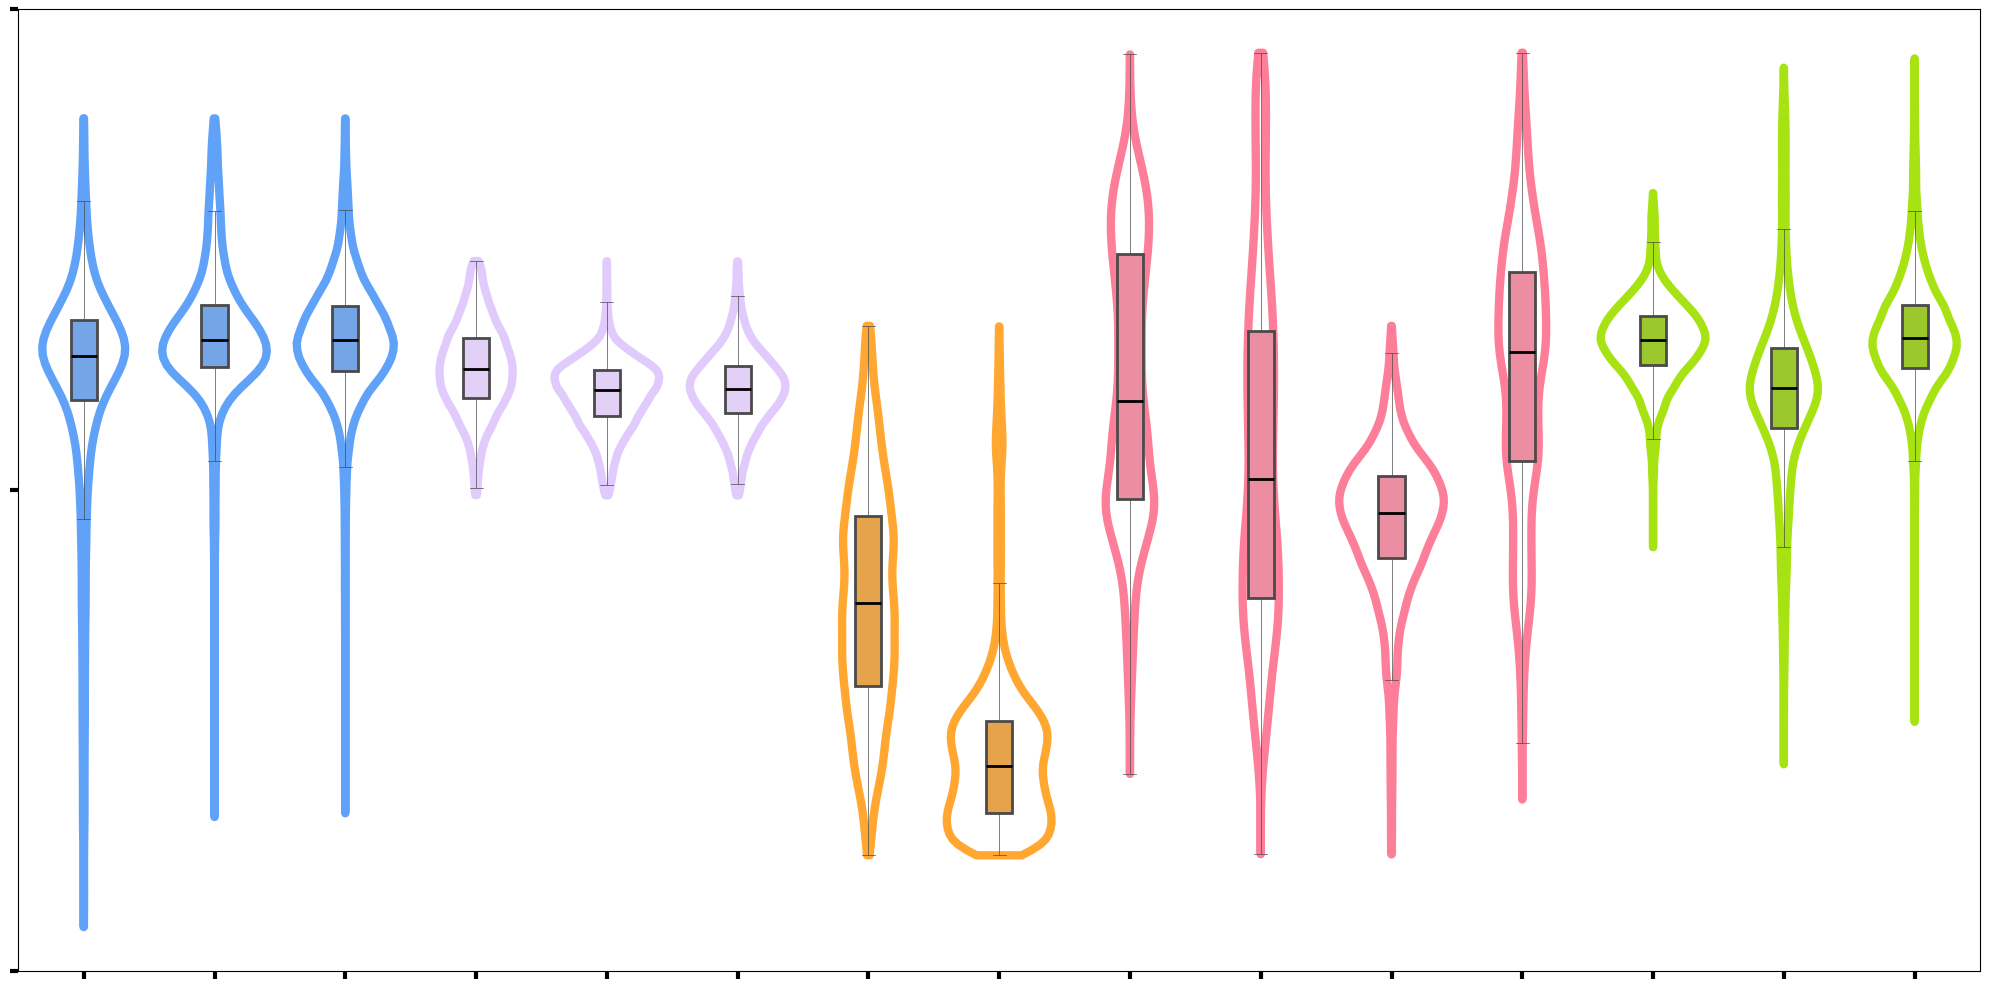

In [17]:

import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(86)
nature_colors  = {
    'Beaufort_Coastal_Plain': '#61A2F9',  
    'Brooks_Foothills': '#E1CAFC',        
    'Northern_Brooks_Range': '#FFA731',  
    'Southern_Brooks_Range': '#FC7E99',   
    'Kobuk_Ridges_and_Valley': '#A7E213' 
}


# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\updated_aviris\AVIRIS_trait_map3\split\pn\ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_pn_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 3330),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_pn_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',18325),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_pn_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_pn_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 2015),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_pn_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_pn_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 3330),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_pn_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18325), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_pn_ymax_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18224),
    

    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_pn_ymax_masked.tif':( 'Brooks_Foothills','Arctic_Gravelly_Riverine',36990),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_pn_ymax_masked.tif':('Brooks_Foothills','Arctic_Peaty_Glaciated_Upland',36990),

    
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_pn_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland',22946),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site4a_pc_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1297),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site6c_pc_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1774),


    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_pn_ymax_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Acidic_Alpine',60712),
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_pn_ymax_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Glaciated_Upland',39287),



    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site4b_pn_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',7072),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_pn_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',16516),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_pn_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',6166),
    # 'Southern_Brooks_Range_Boreal_Peaty_Glaciated_Upland_site4b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Peaty_Glaciated_Upland',8162),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_pn_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',17272),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_pn_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',4813),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site4b_pn_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',13730),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_pn_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',3492),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_pn_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',16523),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_pn_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',6249),


    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_pn_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Gravelly_Riverine',36492),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_pn_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Peaty_Glaciated_Upland',37131),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_pn_ymax_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Rocky_Glaciated_Upland',26375)

}




# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        ecoregion_values[key].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Create combined group labels
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define color palette for ecoregions only
# color_map = {
#     'Beaufort_Coastal_Plain': 'salmon',
#     'Brooks_Foothills': 'goldenrod',
#     'Northern_Brooks_Range': 'lightskyblue',
#     'Southern_Brooks_Range': 'lightpink',
#     'Kobuk_Ridges_and_Valley': 'forestgreen'
# }

plt.figure(figsize=(20, 10))

# 1. 创建小提琴图（无填充，只有轮廓）
violins = sns.violinplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,
    linewidth=6,
    saturation=1,
    inner=None,
    cut=0,
    dodge=False,                  # 不分开 violin（整组一个 outline）
    fill=False                    # 无填充
)

# 2. 创建箱线图（叠在 violin 上，填充带透明度）
boxplots = sns.boxplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,        # 初始颜色，后面同步
    width=0.2,
    linewidth=5,
    boxprops={'linewidth': 2, 'alpha': 1},  # 透明度设置在这里
    whiskerprops={'linewidth': 0.5},
    capprops={'linewidth': 0.5},
    medianprops={'color': 'black', 'linewidth': 2},  # 中位线保持黑色
    flierprops={
        'marker': 'o',
        'markersize': 10,
        'markeredgecolor': 'none',
        'alpha': 0.7
    },
    ax=violins                     # 共享 ax，叠在一起
)

# 3. 同步颜色（修复偏灰问题）
group_order = [t.get_text() for t in violins.get_xticklabels()]
ecoregion_per_group = {
    group: df_samples[df_samples['Group'] == group]['Ecoregion'].iloc[0]
    for group in group_order
}

for i, group in enumerate(group_order):
    ecoregion = ecoregion_per_group[group]
    box_index = i * len(nature_colors)
    
    if box_index < len(boxplots.artists):
        box = boxplots.artists[box_index]
        violin_color = box.get_facecolor()[:3]  # ⭐️ 只取 RGB，去掉 alpha

        # 设置 violin outline 颜色
        violins.collections[i].set_edgecolor(violin_color)

        # 设置 boxplot 颜色
        box.set_edgecolor(violin_color)
        box.set_facecolor(box.get_facecolor())  # 保持 box 的 alpha 透明度

        # 须线和端线
        for line in boxplots.lines[box_index * 6 : (box_index + 1) * 6 - 1]:
            line.set_color(violin_color)

        # 异常值（fliers）
        fliers = boxplots.lines[box_index * 6 + 5 :: len(nature_colors) * 6]
        for flier in fliers:
            flier.set_markerfacecolor(violin_color)
            flier.set_markeredgecolor(violin_color)


plt.xlabel('')
plt.ylabel('')
# Get current y-limits
# Get current y-limits for reference (optional)
ymin, ymax = plt.ylim()
ymid = (ymin + ymax) / 2
print("True min:", df_samples['Sampled Values'].min())
print("True min:", df_samples['Sampled Values'].max())

# Set y-ticks for positioning but hide the labels
plt.yticks([ymin, ymid, ymax], ['', '', ''], fontsize=30)

# Set x-ticks and hide labels as well
group_order = [t.get_text() for t in violins.get_xticklabels()]
tick_positions = np.arange(len(group_order))
plt.xticks(tick_positions, ['' for _ in tick_positions], fontsize=30)
# Make tick marks thicker
plt.tick_params(axis='both', width=3, length=6)

# Optional: remove legend if it exists
if hasattr(boxplots, 'legend_') and boxplots.legend_:
    boxplots.legend_.remove()

# 6. 保存图像
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\updated_aviris\violin_plot\pn_ymax.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
plt.show()


# pn std

True min: 0.09358406066894531
True min: 15.903153419494629


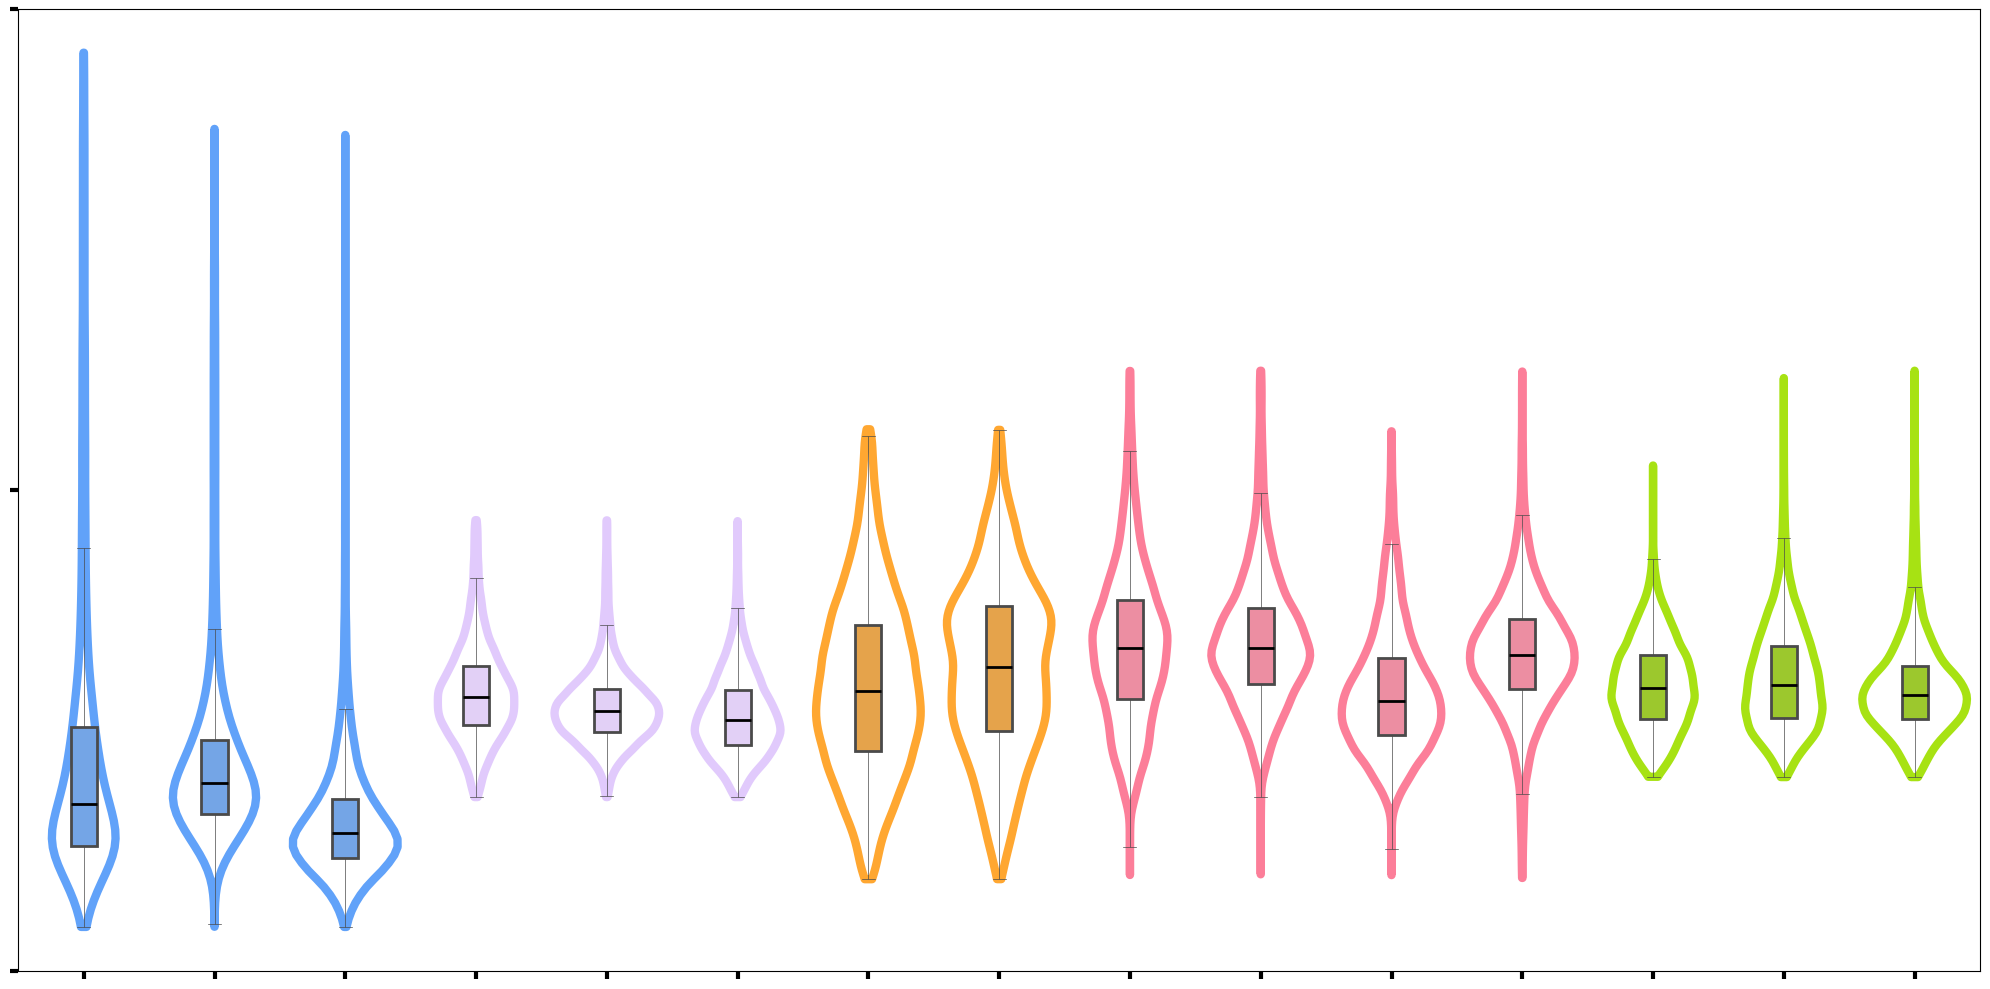

In [2]:

import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(86)
nature_colors  = {
    'Beaufort_Coastal_Plain': '#61A2F9',  
    'Brooks_Foothills': '#E1CAFC',        
    'Northern_Brooks_Range': '#FFA731',  
    'Southern_Brooks_Range': '#FC7E99',   
    'Kobuk_Ridges_and_Valley': '#A7E213' 
}


# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\updated_aviris\AVIRIS_trait_map3\split\pn\std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_pn_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 3330),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_pn_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',18325),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_pn_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_pn_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 2015),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_pn_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 18224),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_pn_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 3330),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_pn_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18325), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_pn_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 18224),
    

    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_pn_std_masked.tif':( 'Brooks_Foothills','Arctic_Gravelly_Riverine',36990),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_pn_std_masked.tif':('Brooks_Foothills','Arctic_Peaty_Glaciated_Upland',36990),

    
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_pn_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland',22946),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site4a_pc_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1297),
    # 'Brooks_Foothills_Arctic_Rocky_Upland_site6c_pc_ymax_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',1774),


    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_pn_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Acidic_Alpine',60712),
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_pn_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Glaciated_Upland',39287),



    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site4b_pn_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',7072),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_pn_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',16516),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_pn_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',6166),
    # 'Southern_Brooks_Range_Boreal_Peaty_Glaciated_Upland_site4b_d15n_ymax_masked.tif':('Southern_Brooks_Range','Boreal_Peaty_Glaciated_Upland',8162),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_pn_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',17272),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_pn_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',4813),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site4b_pn_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',13730),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_pn_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',3492),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_pn_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',16523),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_pn_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',6249),


    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_pn_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Gravelly_Riverine',36492),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_pn_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Peaty_Glaciated_Upland',37131),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_pn_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Rocky_Glaciated_Upland',26375)

}




# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        ecoregion_values[key].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Create combined group labels
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define color palette for ecoregions only
# color_map = {
#     'Beaufort_Coastal_Plain': 'salmon',
#     'Brooks_Foothills': 'goldenrod',
#     'Northern_Brooks_Range': 'lightskyblue',
#     'Southern_Brooks_Range': 'lightpink',
#     'Kobuk_Ridges_and_Valley': 'forestgreen'
# }

plt.figure(figsize=(20, 10))

# 1. 创建小提琴图（无填充，只有轮廓）
violins = sns.violinplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,
    linewidth=6,
    saturation=1,
    inner=None,
    cut=0,
    dodge=False,                  # 不分开 violin（整组一个 outline）
    fill=False                    # 无填充
)

# 2. 创建箱线图（叠在 violin 上，填充带透明度）
boxplots = sns.boxplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',
    palette=nature_colors,        # 初始颜色，后面同步
    width=0.2,
    linewidth=5,
    boxprops={'linewidth': 2, 'alpha': 1},  # 透明度设置在这里
    whiskerprops={'linewidth': 0.5},
    capprops={'linewidth': 0.5},
    medianprops={'color': 'black', 'linewidth': 2},  # 中位线保持黑色
    flierprops={
        'marker': 'o',
        'markersize': 10,
        'markeredgecolor': 'none',
        'alpha': 0.7
    },
    ax=violins                     # 共享 ax，叠在一起
)

# 3. 同步颜色（修复偏灰问题）
group_order = [t.get_text() for t in violins.get_xticklabels()]
ecoregion_per_group = {
    group: df_samples[df_samples['Group'] == group]['Ecoregion'].iloc[0]
    for group in group_order
}

for i, group in enumerate(group_order):
    ecoregion = ecoregion_per_group[group]
    box_index = i * len(nature_colors)
    
    if box_index < len(boxplots.artists):
        box = boxplots.artists[box_index]
        violin_color = box.get_facecolor()[:3]  # ⭐️ 只取 RGB，去掉 alpha

        # 设置 violin outline 颜色
        violins.collections[i].set_edgecolor(violin_color)

        # 设置 boxplot 颜色
        box.set_edgecolor(violin_color)
        box.set_facecolor(box.get_facecolor())  # 保持 box 的 alpha 透明度

        # 须线和端线
        for line in boxplots.lines[box_index * 6 : (box_index + 1) * 6 - 1]:
            line.set_color(violin_color)

        # 异常值（fliers）
        fliers = boxplots.lines[box_index * 6 + 5 :: len(nature_colors) * 6]
        for flier in fliers:
            flier.set_markerfacecolor(violin_color)
            flier.set_markeredgecolor(violin_color)


plt.xlabel('')
plt.ylabel('')
# Get current y-limits for reference (optional)
ymin, ymax = plt.ylim()
ymid = (ymin + ymax) / 2
print("True min:", df_samples['Sampled Values'].min())
print("True min:", df_samples['Sampled Values'].max())


# Set y-ticks for positioning but hide the labels
plt.yticks([ymin, ymid, ymax], ['', '', ''], fontsize=30)

# Set x-ticks and hide labels as well
group_order = [t.get_text() for t in violins.get_xticklabels()]
tick_positions = np.arange(len(group_order))
plt.xticks(tick_positions, ['' for _ in tick_positions], fontsize=30)
# Make tick marks thicker
plt.tick_params(axis='both', width=3, length=6)

# Optional: remove legend if it exists
if hasattr(boxplots, 'legend_') and boxplots.legend_:
    boxplots.legend_.remove()

# 6. 保存图像
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\updated_aviris\violin_plot\pn_std.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)
plt.show()
